In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:/Users/madhu/OneDrive/Documents/Jobsdata.csv.csv",  encoding='latin1')

In [4]:
print(df.shape)

(735, 32)


In [5]:
df.head(3)

,Company_Clean,Rating,City,state/Country,Location,Position_Name,Python,SQL,R,machine_learning,...,Salary,Url,JobType_All,JobType_0,JobType_1,JobType_2,JobType_3,Search_Input_country,Search_Input_position,External_Apply_Link
0,Google,4.3,San Bruno,CA,"San Bruno, CA","Senior Data Scientist, Research, Youtube Search",Yes,Yes,Yes,No,...,"$166,000 - $244,000",https://www.indeed.com/viewjob?jk=3129ec5dde24...,Full-time,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.google.com/about/careers/applicati...
1,Baxter,3.7,Milwaukee,WI 53214,"Milwaukee, WI 53214",Senior Ai Engineer Data Scientist,Yes,No,Yes,Yes,...,"$112,000 - $154,000",https://www.indeed.com/viewjob?jk=19da1b85455c...,Full-time,Full-time,NaN,NaN,NaN,US,Data Scientist,https://jobs.baxter.com/en/job/-/-/152/8298788...
2,Meta,4.2,Redmond,WA,"Redmond, WA","Audio Software Engineer, Applied Scientist",No,No,Yes,Yes,...,$70.67,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,Full-time,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/3101204833367...


In [6]:
df.tail(3)

,Company_Clean,Rating,City,state/Country,Location,Position_Name,Python,SQL,R,machine_learning,...,Salary,Url,JobType_All,JobType_0,JobType_1,JobType_2,JobType_3,Search_Input_country,Search_Input_position,External_Apply_Link
732,Vanguard,3.6,Charlotte,NC,"Charlotte, NC","Domain Architect Ai/Ml, Senior Specialist",No,No,Yes,Yes,...,NaN,https://www.indeed.com/viewjob?jk=b26b2fdaa44c...,NaN,NaN,NaN,NaN,NaN,US,Data Scientist,https://www.vanguardjobs.com/job/22004413/doma...
733,Guidehouse,3.3,Huntsville,AL 35806,"Huntsville, AL 35806",Data Analytics Consultant,Yes,No,Yes,No,...,NaN,https://www.indeed.com/viewjob?jk=ba05cd000d5b...,NaN,NaN,NaN,NaN,NaN,US,Data Scientist,https://guidehouse.searchgreatcareers.com/job/...
734,Vanguard,3.6,Malvern,PA,"Malvern, PA",Senior Gen Ai Technical Lead,Yes,No,Yes,No,...,NaN,https://www.indeed.com/viewjob?jk=e587a3d57c2e...,NaN,NaN,NaN,NaN,NaN,US,Data Scientist,https://www.vanguardjobs.com/job/22091869/seni...


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_Clean          735 non-null    object 
 1   Rating                 735 non-null    float64
 2   City                   646 non-null    object 
 3   state/Country          646 non-null    object 
 4   Location               735 non-null    object 
 5   Position_Name          735 non-null    object 
 6   Python                 735 non-null    object 
 7   SQL                    735 non-null    object 
 8   R                      735 non-null    object 
 9   machine_learning       735 non-null    object 
 10  Excel                  735 non-null    object 
 11  tableau                735 non-null    object 
 12  Deep_Learning          735 non-null    object 
 13  PowerBI                735 non-null    object 
 14  Degree_Required        735 non-null    object 
 15  Descri

In [29]:
print(df.columns.tolist())

['Company_Clean', 'Rating', 'City', 'state/Country', 'Location', 'Position_Name', 'Python', 'SQL', 'R', 'machine_learning', 'Excel', 'tableau', 'Deep_Learning', 'PowerBI', 'Degree_Required', 'Description', 'Pay_Period_Detect', 'Min_Salary', 'Max_Salary', 'Avg_Salary', 'Salary_Clean', 'Currency', 'Salary', 'Url', 'JobType_All', 'JobType_0', 'JobType_1', 'JobType_2', 'JobType_3', 'Search_Input_country', 'Search_Input_position', 'External_Apply_Link']


In [31]:
#Standardize column names (very important)
df.columns = (
    df.columns.str.strip()
    .str.replace(r'[/\s]+','-', regex=True)
    .str.replace(r'[^0-9a-zA-Z_]','', regex=True)
    .str.lower()
)

df.columns.tolist()[:30]

['company_clean',
 'rating',
 'city',
 'statecountry',
 'location',
 'position_name',
 'python',
 'sql',
 'r',
 'machine_learning',
 'excel',
 'tableau',
 'deep_learning',
 'powerbi',
 'degree_required',
 'description',
 'pay_period_detect',
 'min_salary',
 'max_salary',
 'avg_salary',
 'salary_clean',
 'currency',
 'salary',
 'url',
 'jobtype_all',
 'jobtype_0',
 'jobtype_1',
 'jobtype_2',
 'jobtype_3',
 'search_input_country']

In [34]:
#Trim strings
for c in df.select_dtypes(include='object'):
    df[c] = df[c].astype(str).str.strip().replace({'':np.nan,'na':np.nan,'none':np.nan,'nan':np.nan}, regex=True)

In [38]:
# Optional: lower-case for certain fields
txt_cols = ['company_clean','city','state_country','location','position_name','currency','jobtype_all']
for c in [x for x in txt_cols if x in df.columns]:
    df[c]=df[c].str.lower()

In [40]:
#De-duplicate
subset1 = [c for c in ['url'] if c in df.columns]
subset2 = [c for c in ['position_name','company_clean','city','state_country','avg_salary'] if c in df.columns]

if subset1:
    df = df.drop_duplicates(subset=subset1, keep='last')
elif subset2:
    df = df.drop_duplicates(subset=subset2, keep='last')
else:
    df = df.drop_duplicates(keep='last')

df.shape


(735, 32)

In [42]:
#Coerce numeric columns (salary & rating)
num_cols = [c for c in ['rating','min_salary','max_salary','avg_salary','salary_clean'] if c in df.columns]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')


In [44]:
#Build a reliable avg_salary
if 'avg_salary' not in df.columns:
    df['avg_salary'] = np.nan

has_minmax = df[['min_salary','max_salary']].notna().all(axis=1) if set(['min_salary','max_salary']).issubset(df.columns) else pd.Series(False, index=df.index)
df.loc[df['avg_salary'].isna() & has_minmax, 'avg_salary'] = (df.loc[has_minmax, 'min_salary'] + df.loc[has_minmax, 'max_salary'])/2

# Fallback: if 'salary_clean' exists, use it
if 'salary_clean' in df.columns:
    df['avg_salary'] = df['avg_salary'].fillna(df['salary_clean'])


In [46]:
#Normalize pay period → annual (if column exists)
if 'pay_period_detect' in df.columns:
    df['pay_period_detect'] = df['pay_period_detect'].astype(str).str.lower()
    # Create annualized salary (no currency conversion here)
    def to_annual(row):
        s = row['avg_salary']
        p = row['pay_period_detect']
        if pd.isna(s) or pd.isna(p): 
            return np.nan
        if 'hour' in p:   # approx 2080 working hours/year
            return s * 2080
        if 'month' in p:
            return s * 12
        # default assume already annual
        return s

    df['salary_annual'] = df.apply(to_annual, axis=1)
else:
    df['salary_annual'] = df['avg_salary']


In [48]:
#Dates (only if you have any date column)
date_like = [c for c in df.columns if any(k in c for k in ['date','posted','year'])]
for c in date_like:
    df[c] = pd.to_datetime(df[c], errors='coerce', dayfirst=True)

# Create a 'year' column if you found a real date column
dt_cols = [c for c in date_like if np.issubdtype(df[c].dtype, np.datetime64)]
if dt_cols:
    df['year'] = df[dt_cols[0]].dt.year


In [50]:
#Skills columns → make them clean 0/1
possible_skills = ['python','sql','r','machine_learning','excel','tableau','deep_learning','powerbi']
skills = [c for c in possible_skills if c in df.columns]

for c in skills:
    df[c] = (df[c].astype(str)
                 .str.lower()
                 .replace({'yes': '1', 'true': '1', 'y': '1', 'no': '0', 'false': '0', 'n': '0'})
             )
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int)

# Count how many skills each job asks for
if skills:
    df['skill_count'] = df[skills].sum(axis=1)


In [52]:
# If city missing but 'location' has "city, state", try to fill city
if 'city' in df.columns and 'location' in df.columns:
    need_city = df['city'].isna() | (df['city'].str.len()==0)
    split_loc = df.loc[need_city, 'location'].str.split(',', n=1, expand=True)
    df.loc[need_city & split_loc[0].notna(), 'city'] = split_loc[0].str.strip()
    if 'state_country' in df.columns and split_loc.shape[1] > 1:
        df.loc[need_city & split_loc[1].notna(), 'state_country'] = split_loc[1].str.strip()


In [54]:
#Remote flag (derive if not present)
remote_sources = []
if 'location' in df.columns: remote_sources.append(df['location'].str.contains('remote', case=False, na=False))
if 'jobtype_all' in df.columns: remote_sources.append(df['jobtype_all'].str.contains('remote', case=False, na=False))

df['is_remote'] = False
if remote_sources:
    df['is_remote'] = np.logical_or.reduce(remote_sources).astype(int)  # 1/0


In [56]:
#Role normalization (standard labels)
def normalize_role(title):
    if pd.isna(title): return np.nan
    t = title.lower()
    if any(k in t for k in ['ml engineer','machine learning engineer']): return 'ml engineer'
    if any(k in t for k in ['data scientist','scientist ai']): return 'data scientist'
    if any(k in t for k in ['data engineer','etl engineer','dwh']): return 'data engineer'
    if any(k in t for k in ['data analyst','business analyst','bi analyst']): return 'data analyst'
    if any(k in t for k in ['mlops','ml ops','platform']): return 'mlops / platform'
    if any(k in t for k in ['ai engineer','genai','llm']): return 'ai engineer'
    return 'other'

if 'position_name' in df.columns:
    df['role_norm'] = df['position_name'].map(normalize_role)


In [58]:
#Seniority tag (jr/mid/sr/lead)
def seniority_from_title(title):
    if pd.isna(title): return 'mid'
    t = title.lower()
    if any(k in t for k in ['intern','junior','jr']): return 'junior'
    if any(k in t for k in ['senior','sr','lead','principal','staff']): return 'senior'
    return 'mid'

if 'position_name' in df.columns:
    df['seniority'] = df['position_name'].map(seniority_from_title)


In [60]:
#Outlier handling (salary)
sal = df['salary_annual'].dropna()
if not sal.empty:
    lo, hi = sal.quantile(0.01), sal.quantile(0.99)
    df['salary_annual_capped'] = df['salary_annual'].clip(lower=lo, upper=hi)
else:
    df['salary_annual_capped'] = df['salary_annual']


In [62]:
#Final sanity checks
# Missingness report
na_pct = df.isna().mean().sort_values(ascending=False)
print(na_pct.head(15))

# Quick distributions
df[skills].sum().sort_values(ascending=False) if skills else None
df.groupby('role_norm')['salary_annual_capped'].median().sort_values(ascending=False).head(10) if 'role_norm' in df.columns else None


jobtype_3               0.998639
jobtype_2               0.998639
description             0.995918
jobtype_1               0.974150
salary_clean            0.971429
external_apply_link     0.453061
avg_salary              0.321088
salary_annual           0.321088
salary_annual_capped    0.321088
max_salary              0.321088
min_salary              0.321088
jobtype_all             0.318367
jobtype_0               0.318367
salary                  0.311565
role_norm               0.268027
dtype: float64


role_norm
mlops / platform    215000.0
other               175500.0
ml engineer         169380.0
ai engineer         156400.0
data engineer       152500.0
data scientist      149300.0
Name: salary_annual_capped, dtype: float64

In [65]:
#Save for Power BI (or next steps)
df.to_csv("jobs_after_sql_python_clean.csv", index=False)


In [67]:
df.shape

(735, 38)

In [69]:
df.dtypes

company_clean             object
rating                   float64
city                      object
statecountry              object
location                  object
position_name             object
python                     int64
sql                        int64
r                          int64
machine_learning           int64
excel                      int64
tableau                    int64
deep_learning              int64
powerbi                    int64
degree_required           object
description               object
pay_period_detect         object
min_salary               float64
max_salary               float64
avg_salary               float64
salary_clean             float64
currency                  object
salary                    object
url                       object
jobtype_all               object
jobtype_0                 object
jobtype_1                 object
jobtype_2                 object
jobtype_3                 object
search_input_country      object
search_inp

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company_clean          707 non-null    object 
 1   rating                 735 non-null    float64
 2   city                   721 non-null    object 
 3   statecountry           646 non-null    object 
 4   location               721 non-null    object 
 5   position_name          538 non-null    object 
 6   python                 735 non-null    int64  
 7   sql                    735 non-null    int64  
 8   r                      735 non-null    int64  
 9   machine_learning       735 non-null    int64  
 10  excel                  735 non-null    int64  
 11  tableau                735 non-null    int64  
 12  deep_learning          735 non-null    int64  
 13  powerbi                735 non-null    int64  
 14  degree_required        735 non-null    object 
 15  descri

In [73]:
df.describe()

,rating,python,sql,r,machine_learning,excel,tableau,deep_learning,powerbi,min_salary,max_salary,avg_salary,salary_clean,salary_annual,skill_count,is_remote,salary_annual_capped
count,735.000000,735.000000,735.000000,735.0,735.000000,735.000000,735.000000,735.000000,735.000000,499.000000,499.000000,499.000000,21.000000,499.000000,735.000000,735.000000,499.000000
mean,3.232109,0.670748,0.424490,1.0,0.627211,0.488435,0.153741,0.194558,0.024490,122120.898297,187720.082385,154920.490341,44667.392381,154920.490341,3.583673,0.069388,154355.478680
std,1.357551,0.470262,0.494602,0.0,0.483876,0.500207,0.360946,0.396129,0.154669,58809.062853,93278.241362,73739.519493,88238.064076,73739.519493,1.397060,0.254285,72167.285332
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,28.000000,28.000000,28.000000,28.000000,1.000000,0.000000,39.445300
25%,3.300000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,95000.000000,143037.500000,121250.000000,56.250000,121250.000000,3.000000,0.000000,121250.000000
50%,3.700000,1.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,127860.000000,200000.000000,165750.000000,90.000000,165750.000000,4.000000,0.000000,165750.000000
75%,4.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,158600.000000,244000.000000,200925.000000,4590.000000,200925.000000,5.000000,0.000000,200925.000000
max,5.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,325000.000000,720000.000000,445000.000000,312000.000000,445000.000000,7.000000,1.000000,312071.000000


In [75]:
df.describe(include='all')  # summary of numeric + categorical


,company_clean,rating,city,statecountry,location,position_name,python,sql,r,machine_learning,...,jobtype_3,search_input_country,search_input_position,external_apply_link,salary_annual,skill_count,is_remote,role_norm,seniority,salary_annual_capped
count,707,735.000000,721,646,721,538,735.000000,735.000000,735.0,735.000000,...,1,735,735,402,499.000000,735.000000,735.000000,538,735,499.000000
unique,407,NaN,196,238,312,385,NaN,NaN,NaN,NaN,...,1,1,1,398,NaN,NaN,NaN,6,3,NaN
top,amazon,NaN,new york,CA,"new york, ny",data scientist,NaN,NaN,NaN,NaN,...,Contract,US,Data Scientist,https://www.google.com/about/careers/applicati...,NaN,NaN,NaN,other,mid,NaN
freq,24,NaN,82,81,62,45,NaN,NaN,NaN,NaN,...,1,735,735,2,NaN,NaN,NaN,246,502,NaN
mean,NaN,3.232109,NaN,NaN,NaN,NaN,0.670748,0.424490,1.0,0.627211,...,NaN,NaN,NaN,NaN,154920.490341,3.583673,0.069388,NaN,NaN,154355.478680
std,NaN,1.357551,NaN,NaN,NaN,NaN,0.470262,0.494602,0.0,0.483876,...,NaN,NaN,NaN,NaN,73739.519493,1.397060,0.254285,NaN,NaN,72167.285332
min,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.0,0.000000,...,NaN,NaN,NaN,NaN,28.000000,1.000000,0.000000,NaN,NaN,39.445300
25%,NaN,3.300000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.0,0.000000,...,NaN,NaN,NaN,NaN,121250.000000,3.000000,0.000000,NaN,NaN,121250.000000
50%,NaN,3.700000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.0,1.000000,...,NaN,NaN,NaN,NaN,165750.000000,4.000000,0.000000,NaN,NaN,165750.000000
75%,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.0,1.000000,...,NaN,NaN,NaN,NaN,200925.000000,5.000000,0.000000,NaN,NaN,200925.000000


In [7]:
df.isnull().sum()

Company_Clean              0
Rating                     0
City                      89
state/Country             89
Location                   0
Position_Name              0
Python                     0
SQL                        0
R                          0
machine_learning           0
Excel                      0
tableau                    0
Deep_Learning              0
PowerBI                    0
Degree_Required            0
Description                0
Pay_Period_Detect          0
Min_Salary               236
Max_Salary               236
Avg_Salary               236
Salary_Clean             229
Currency                   0
Salary                   229
Url                        0
JobType_All              234
JobType_0                234
JobType_1                716
JobType_2                734
JobType_3                734
Search_Input_country       0
Search_Input_position      0
External_Apply_Link      182
dtype: int64

In [79]:
df.dropna()

,company_clean,rating,city,statecountry,location,position_name,python,sql,r,machine_learning,...,jobtype_3,search_input_country,search_input_position,external_apply_link,salary_annual,skill_count,is_remote,role_norm,seniority,salary_annual_capped


In [81]:
df['avg_salary']=df[['min_salary','max_salary']].mean(axis=1)

In [83]:
df=df[df['avg_salary']>0]

In [ ]:
df['Position_Name'] = df['Position_Name'].str.lower()
df['Company_Clean'] = df['Company_Clean'].str.title()

In [86]:
#check duplicates
df.duplicated().sum()
df = df.drop_duplicates()

In [24]:
#quick value counts top job titles
df['Position_Name'].value_counts().head(10)

Position_Name
Data Scientist                      45
Senior Data Scientist               15
Senior Data Analyst                 12
Lead Data Scientist                  7
Principal Data Scientist             7
Sr. Data Scientist                   6
Machine Learning Engineer            6
Ai/Ml Engineer                       6
Ai Engineer                          6
Senior Machine Learning Engineer     5
Name: count, dtype: int64

In [25]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("C:/Users/madhu/OneDrive/Documents/Jobsdata.csv.csv", low_memory=False)

In [13]:
print(df.shape)

(735, 32)


In [15]:
df.head(3)

,Company_Clean,Rating,City,state/Country,Location,Position_Name,Python,SQL,R,machine_learning,...,Salary,Url,JobType_All,JobType_0,JobType_1,JobType_2,JobType_3,Search_Input_country,Search_Input_position,External_Apply_Link
0,Google,4.3,San Bruno,CA,"San Bruno, CA","Senior Data Scientist, Research, Youtube Search",Yes,Yes,Yes,No,...,"$166,000 - $244,000",https://www.indeed.com/viewjob?jk=3129ec5dde24...,Full-time,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.google.com/about/careers/applicati...
1,Baxter,3.7,Milwaukee,WI 53214,"Milwaukee, WI 53214",Senior Ai Engineer Data Scientist,Yes,No,Yes,Yes,...,"$112,000 - $154,000",https://www.indeed.com/viewjob?jk=19da1b85455c...,Full-time,Full-time,NaN,NaN,NaN,US,Data Scientist,https://jobs.baxter.com/en/job/-/-/152/8298788...
2,Meta,4.2,Redmond,WA,"Redmond, WA","Audio Software Engineer, Applied Scientist",No,No,Yes,Yes,...,$70.67,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,Full-time,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/3101204833367...


In [28]:
df.tail(3)

,Company_Clean,Rating,City,state/Country,Location,Position_Name,Python,SQL,R,machine_learning,...,Salary,Url,JobType_All,JobType_0,JobType_1,JobType_2,JobType_3,Search_Input_country,Search_Input_position,External_Apply_Link
732,Vanguard,3.6,Charlotte,NC,"Charlotte, NC","Domain Architect Ai/Ml, Senior Specialist",No,No,Yes,Yes,...,NaN,https://www.indeed.com/viewjob?jk=b26b2fdaa44c...,NaN,NaN,NaN,NaN,NaN,US,Data Scientist,https://www.vanguardjobs.com/job/22004413/doma...
733,Guidehouse,3.3,Huntsville,AL 35806,"Huntsville, AL 35806",Data Analytics Consultant,Yes,No,Yes,No,...,NaN,https://www.indeed.com/viewjob?jk=ba05cd000d5b...,NaN,NaN,NaN,NaN,NaN,US,Data Scientist,https://guidehouse.searchgreatcareers.com/job/...
734,Vanguard,3.6,Malvern,PA,"Malvern, PA",Senior Gen Ai Technical Lead,Yes,No,Yes,No,...,NaN,https://www.indeed.com/viewjob?jk=e587a3d57c2e...,NaN,NaN,NaN,NaN,NaN,US,Data Scientist,https://www.vanguardjobs.com/job/22091869/seni...


In [19]:
df.info

<bound method DataFrame.info of        Company_Clean  Rating        City state/Country              Location  \
0             Google     4.3   San Bruno            CA         San Bruno, CA   
1             Baxter     3.7   Milwaukee      WI 53214   Milwaukee, WI 53214   
2               Meta     4.2     Redmond            WA           Redmond, WA   
3               Meta     4.2    Bellevue      WA 98005    Bellevue, WA 98005   
4    Lockheed Martin     4.0     Shelton      CT 06484     Shelton, CT 06484   
..               ...     ...         ...           ...                   ...   
730             Citi     3.9       Tampa      FL 33601       Tampa, FL 33601   
731         Vanguard     3.6     Malvern            PA           Malvern, PA   
732         Vanguard     3.6   Charlotte            NC         Charlotte, NC   
733       Guidehouse     3.3  Huntsville      AL 35806  Huntsville, AL 35806   
734         Vanguard     3.6     Malvern            PA           Malvern, PA   

       

In [21]:
print(df.columns.tolist())

['Company_Clean', 'Rating', 'City', 'state/Country', 'Location', 'Position_Name', 'Python', 'SQL', 'R', 'machine_learning', 'Excel', 'tableau', 'Deep_Learning', 'PowerBI', 'Degree_Required', 'Description', 'Pay_Period_Detect', 'Min_Salary', 'Max_Salary', 'Avg_Salary', 'Salary_Clean', 'Currency', 'Salary', 'Url', 'JobType_All', 'JobType_0', 'JobType_1', 'JobType_2', 'JobType_3', 'Search_Input_country', 'Search_Input_position', 'External_Apply_Link']


In [26]:
df.describe()

,Rating,Min_Salary,Max_Salary,Avg_Salary
count,735.000000,499.000000,499.000000,499.000000
mean,3.232109,122120.898297,187720.082385,154920.490341
std,1.357551,58809.062853,93278.241362,73739.519493
min,0.000000,25.000000,28.000000,28.000000
25%,3.300000,95000.000000,143037.500000,121250.000000
50%,3.700000,127860.000000,200000.000000,165750.000000
75%,4.000000,158600.000000,244000.000000,200925.000000
max,5.000000,325000.000000,720000.000000,445000.000000


In [30]:
df['City'].value_counts().head(10)

City
New York         82
San Francisco    30
Seattle          30
Sunnyvale        21
Atlanta          20
Mountain View    18
Charlotte        18
Washington       17
Boston           13
McLean           13
Name: count, dtype: int64

In [32]:
df[['Python','SQL','Excel','PowerBI']].sum().sort_values(ascending=False)

Python     YesYesNoYesYesYesYesNoYesNoYesNoYesYesNoNoYesY...
SQL        YesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoYes...
Excel      NoNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoYesYesYes...
PowerBI    NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
dtype: object

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
%matplotlib inline

In [36]:
sns.set(style="whitegrid")

C:\Users\madhu\AppData\Local\Temp\ipykernel_16784\1517345454.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positions.values, y=top_positions.index, palette="viridis")


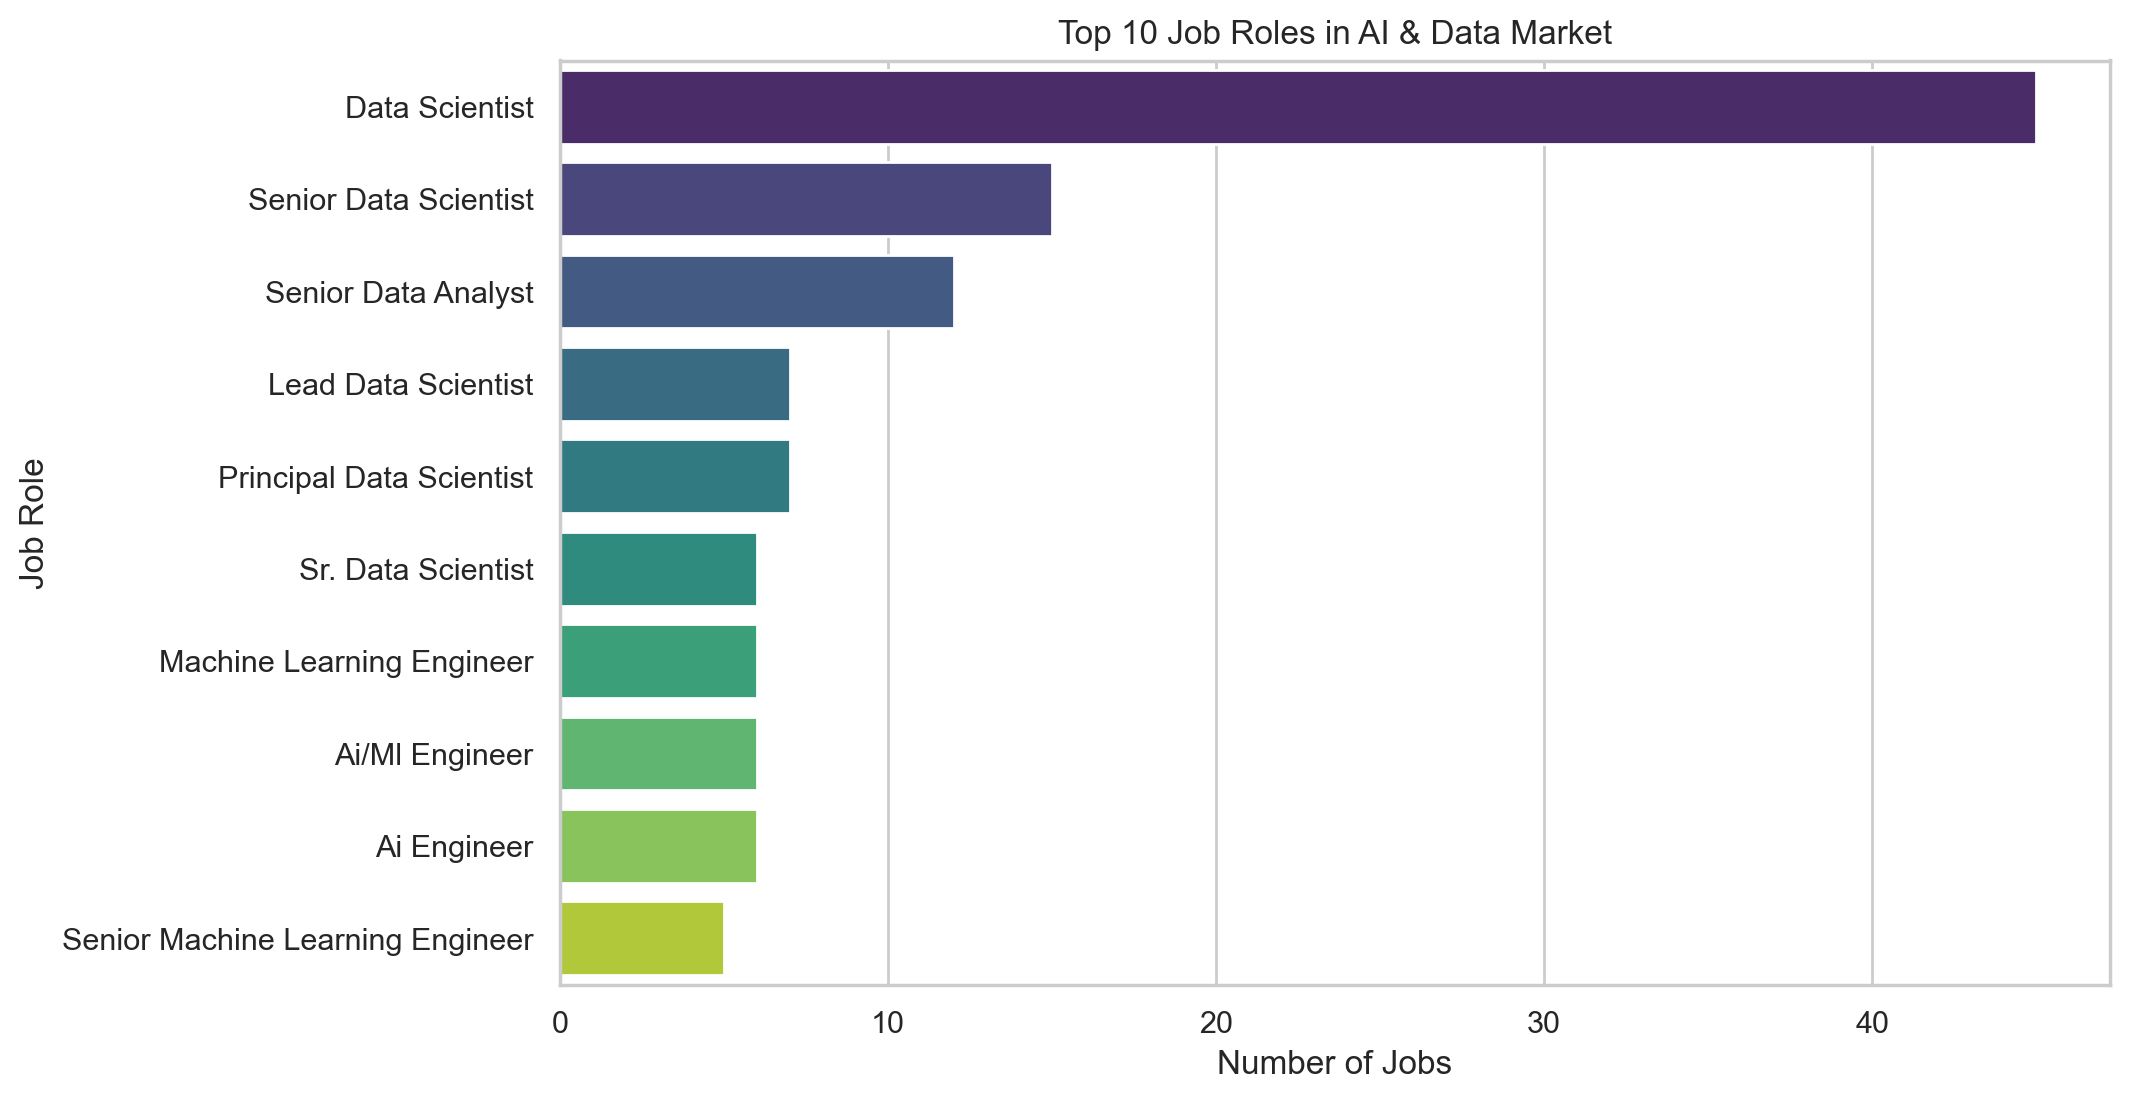

In [72]:
#job demand by top positions:
plt.show(block=True)
top_positions = df['Position_Name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_positions.values, y=top_positions.index, palette="viridis")
plt.title("Top 10 Job Roles in AI & Data Market")
plt.xlabel("Number of Jobs")
plt.ylabel("Job Role")
plt.show()

C:\Users\madhu\AppData\Local\Temp\ipykernel_16784\2316275396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="mako")


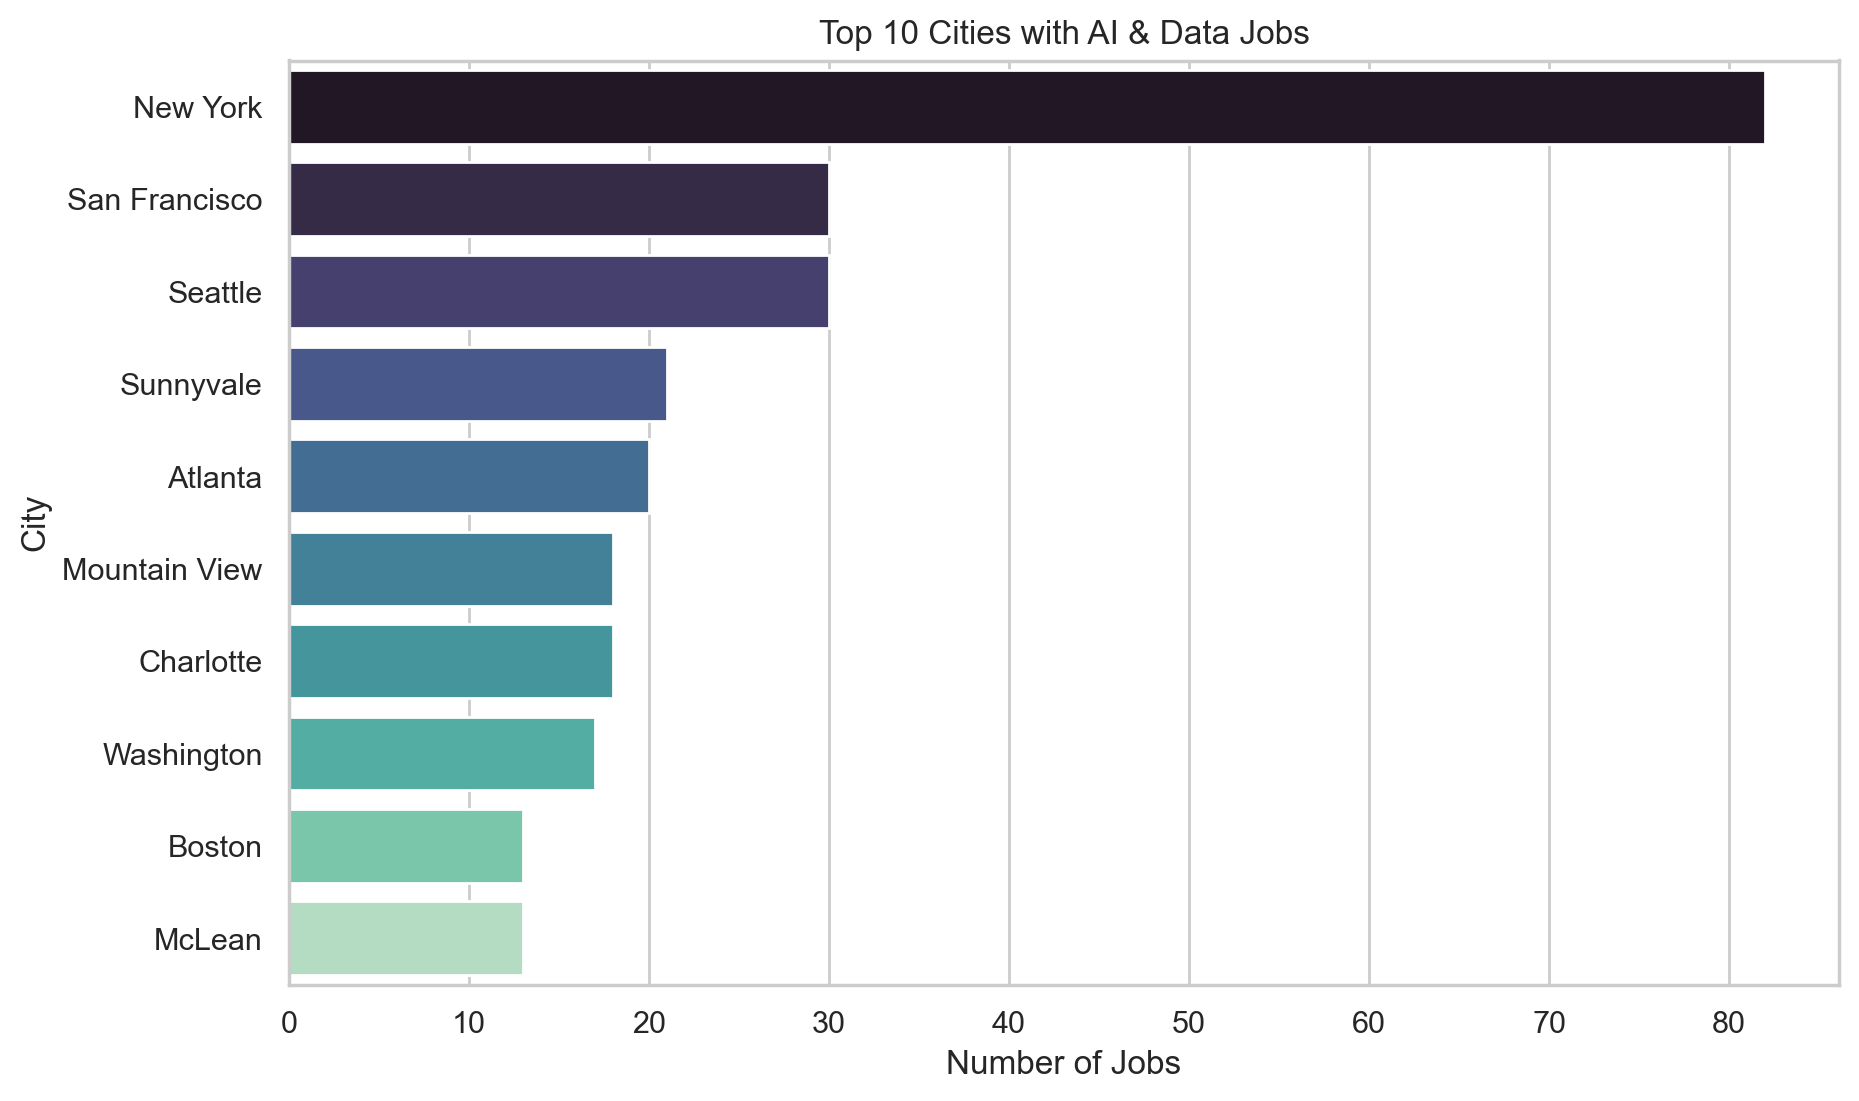

In [73]:
#top 10 cities with most jobs
plt.show(block=True)
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="mako")
plt.title("Top 10 Cities with AI & Data Jobs")
plt.xlabel("Number of Jobs")
plt.ylabel("City")
plt.show()

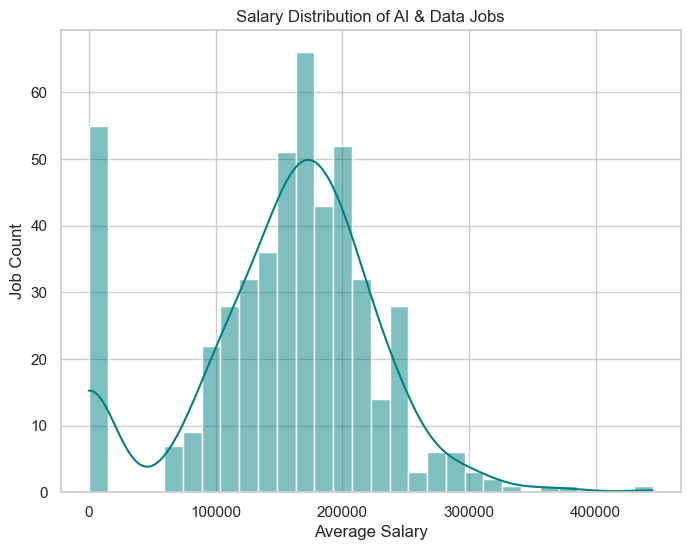

In [43]:
#salary distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Avg_Salary'], bins=30, kde=True, color="teal")
plt.title("Salary Distribution of AI & Data Jobs")
plt.xlabel("Average Salary")
plt.ylabel("Job Count")
plt.show()

C:\Users\madhu\AppData\Local\Temp\ipykernel_16784\4139102723.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Position_Name", y="Avg_Salary", data=df[df['Position_Name'].isin(top_roles)], palette="Set2")


<Figure size 640x480 with 0 Axes>

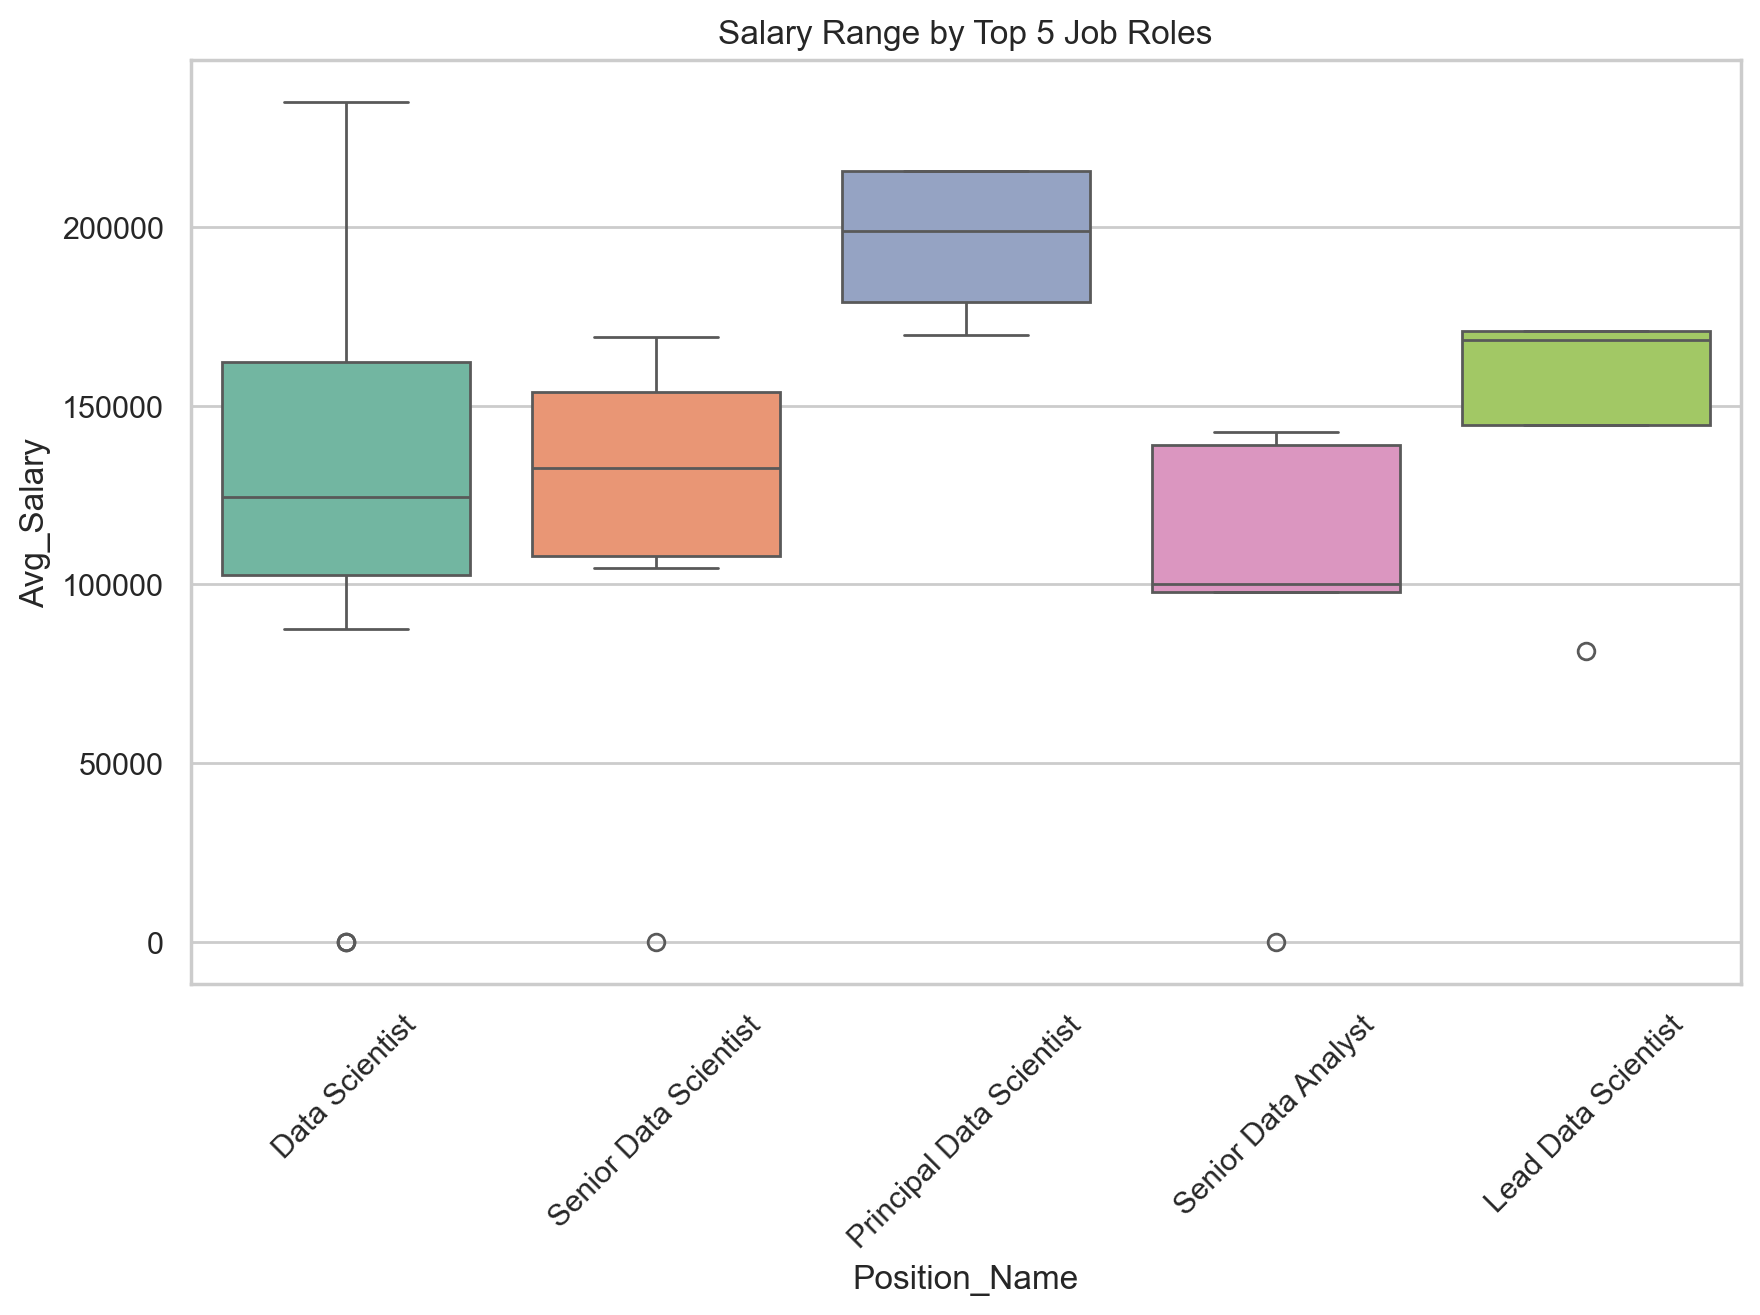

In [78]:
#salary by job role(top 5)
plt.show(block=True)
plt.savefig("top_cities.png")

top_roles = df['Position_Name'].value_counts().head(5).index
plt.figure(figsize=(10,6))
sns.boxplot(x="Position_Name", y="Avg_Salary", data=df[df['Position_Name'].isin(top_roles)], palette="Set2")
plt.title("Salary Range by Top 5 Job Roles")
plt.xticks(rotation=45)
plt.show()

In [77]:
#skills demand (python,sql,etc.)
plt.show(block=True)
plt.savefig("top_cities.png")
plt.figure(figsize=(12,8))   # Bigger chart size

sns.barplot(
    x=skill_counts.values, 
    y=skill_counts.index, 
    hue=skill_counts.values,   # add hue to avoid warning
    palette="coolwarm", 
    dodge=False,               # keep single bars
    legend=False               # remove legend since it's not needed
)

plt.title("Top Skills Demand in AI & Data Jobs", fontsize=16, weight='bold')
plt.xlabel("Number of Job Listings Requiring Skill", fontsize=14)
plt.ylabel("Skill", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<Figure size 640x480 with 0 Axes>

RuntimeError: Could not convert glyph to bitmap (raster overflow; error code 0x62)

<Figure size 1200x800 with 1 Axes>

In [61]:
%config InlineBackend.figure_format = 'retina'

In [67]:
plt.title("Top Skills Demand in AI & Data Jobs", fontsize=18, fontweight='bold', fontname='Arial')
plt.xlabel("Number of Job Listings Requiring Skill", fontsize=14, fontname='Arial')
plt.ylabel("Skill", fontsize=14, fontname='Arial')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Skill')

C:\Users\madhu\AppData\Local\Temp\ipykernel_16784\621693861.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")


<Figure size 640x480 with 0 Axes>

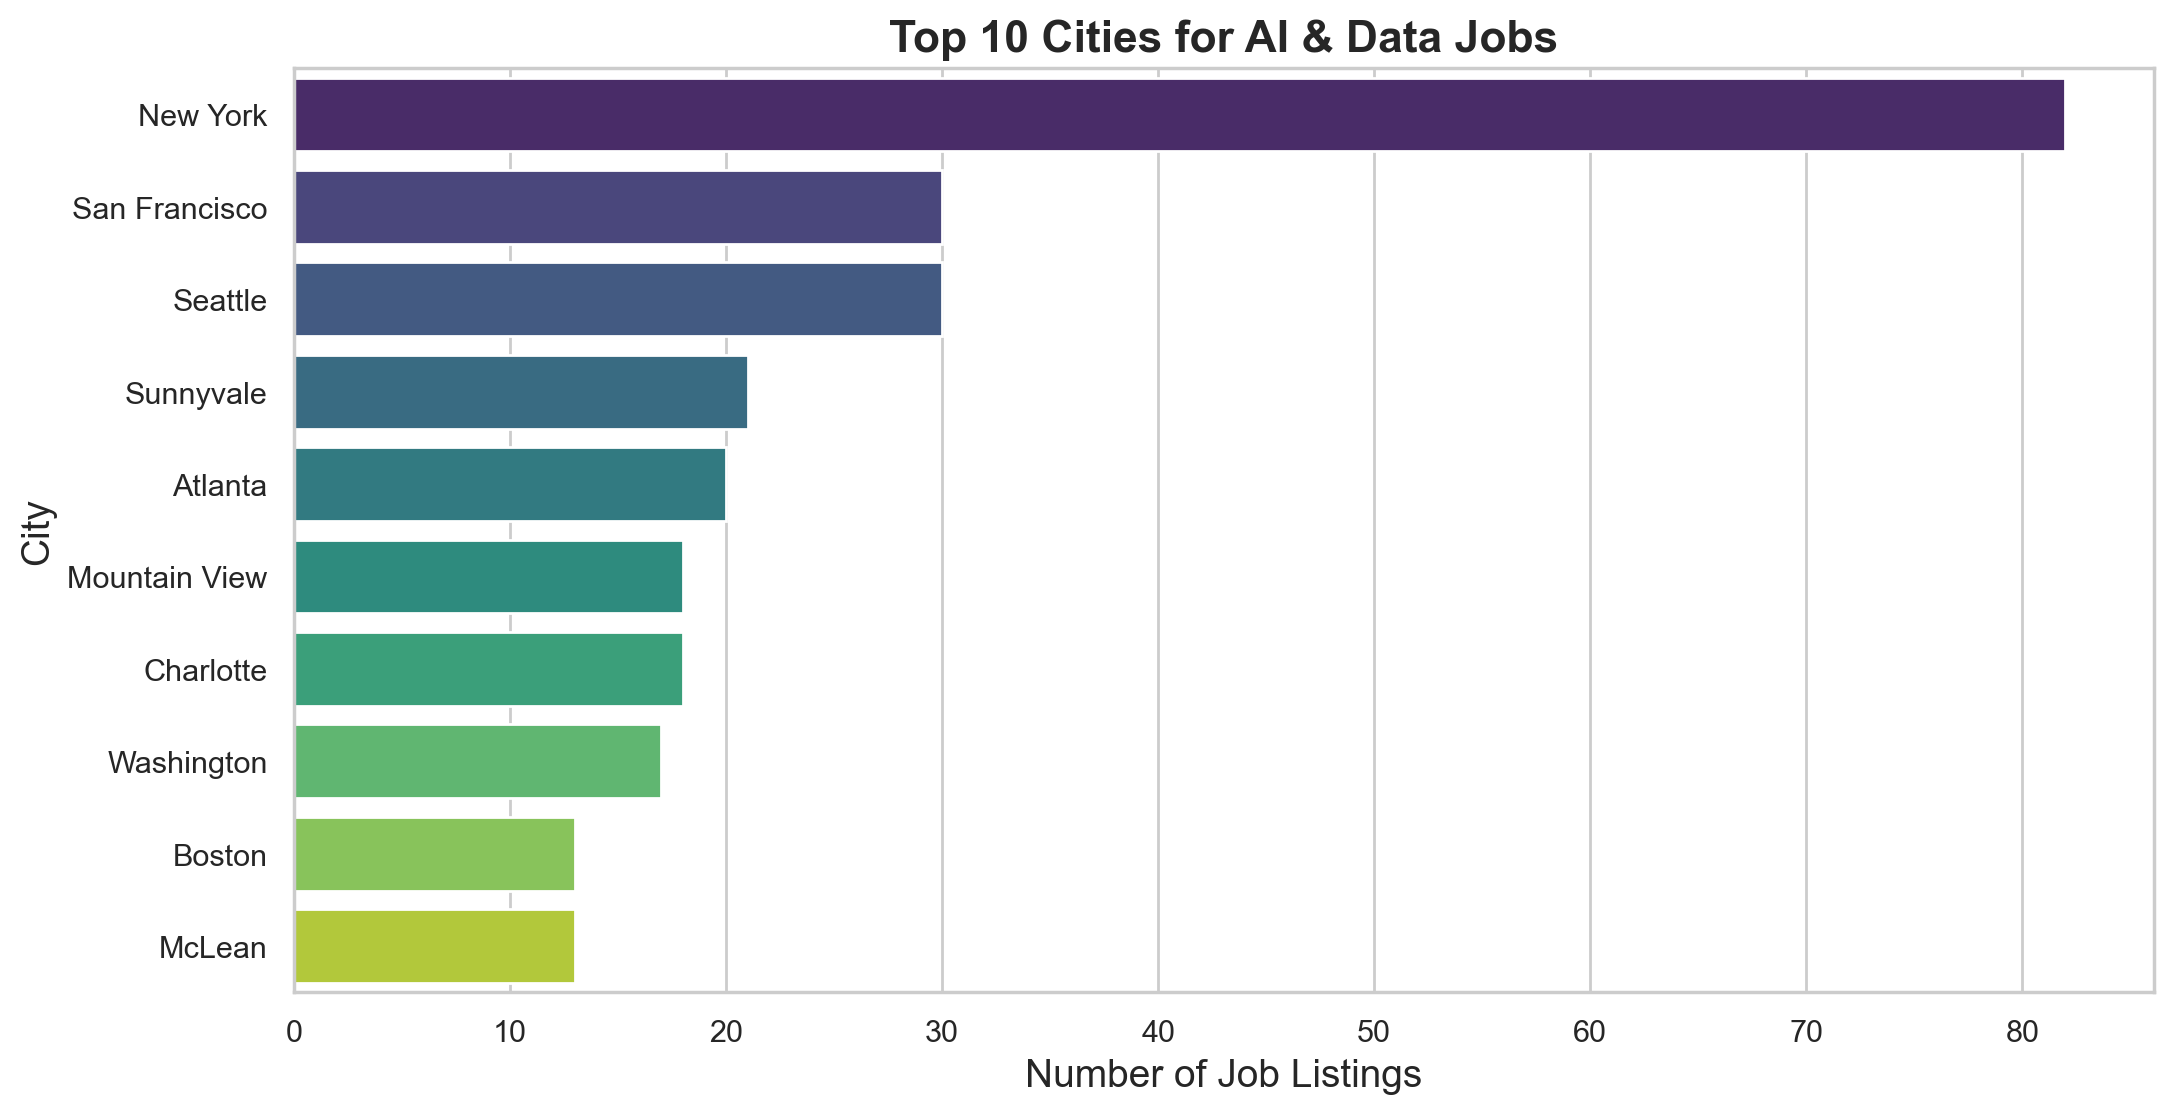

In [80]:
#job location analysis
# count top job cities
plt.savefig("top_cities.png")

top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")

plt.title("Top 10 Cities for AI & Data Jobs", fontsize=16, weight='bold')
plt.xlabel("Number of Job Listings", fontsize=14)
plt.ylabel("City", fontsize=14)
plt.show()

C:\Users\madhu\AppData\Local\Temp\ipykernel_16784\1135183655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")


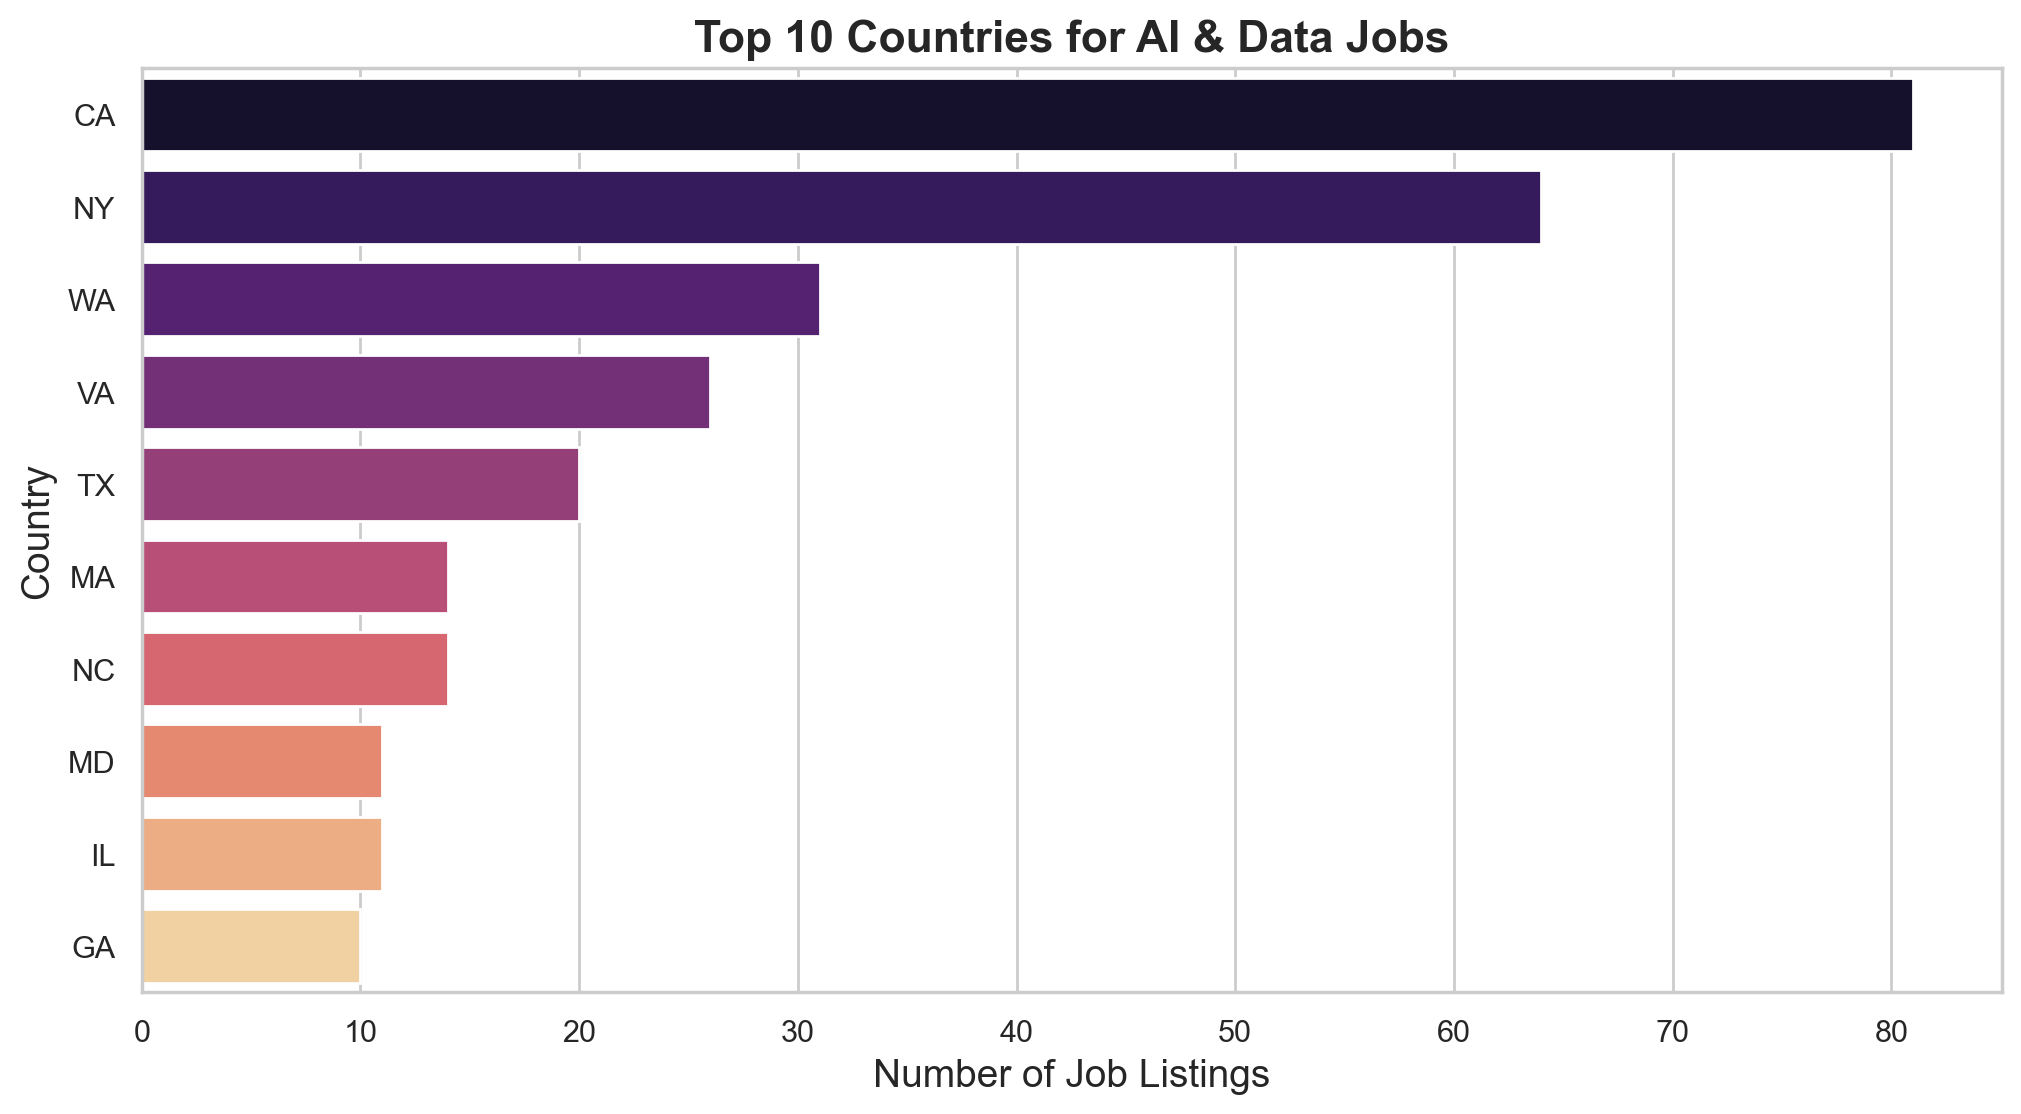

In [83]:
#top 10 job countries
top_countries = df['state/Country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")

plt.title("Top 10 Countries for AI & Data Jobs", fontsize=16, weight='bold')
plt.xlabel("Number of Job Listings", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.show()

C:\Users\madhu\AppData\Local\Temp\ipykernel_16784\967280743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="mako")


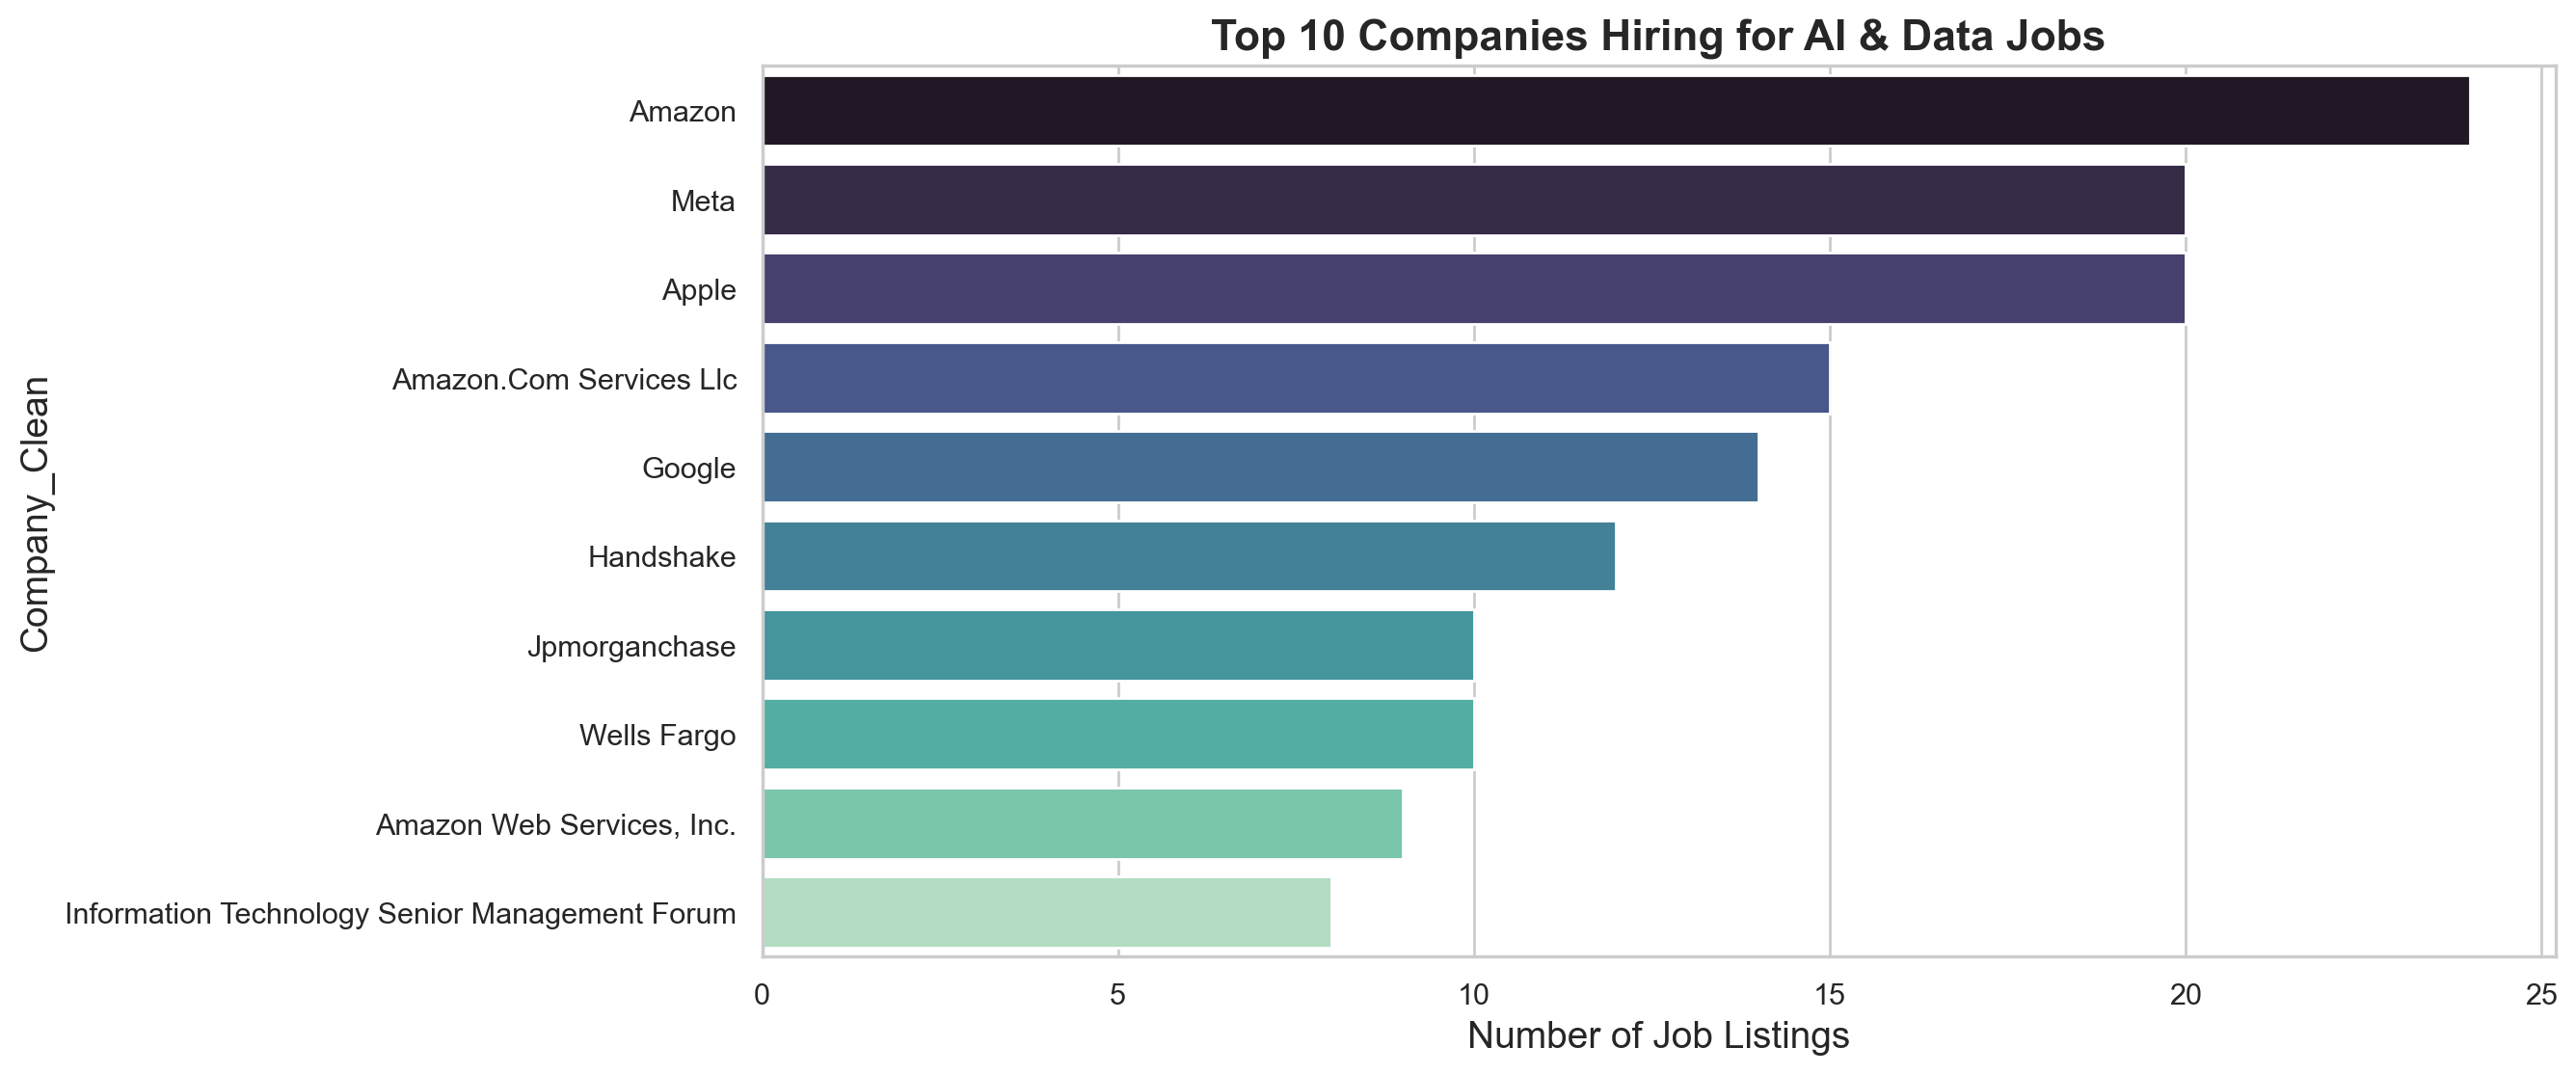

In [87]:
# Step 5: Top Hiring Companies
top_companies = df['Company_Clean'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="mako")

plt.title("Top 10 Companies Hiring for AI & Data Jobs", fontsize=16, weight='bold')
plt.xlabel("Number of Job Listings", fontsize=14)
plt.ylabel("Company_Clean", fontsize=14)
plt.show()

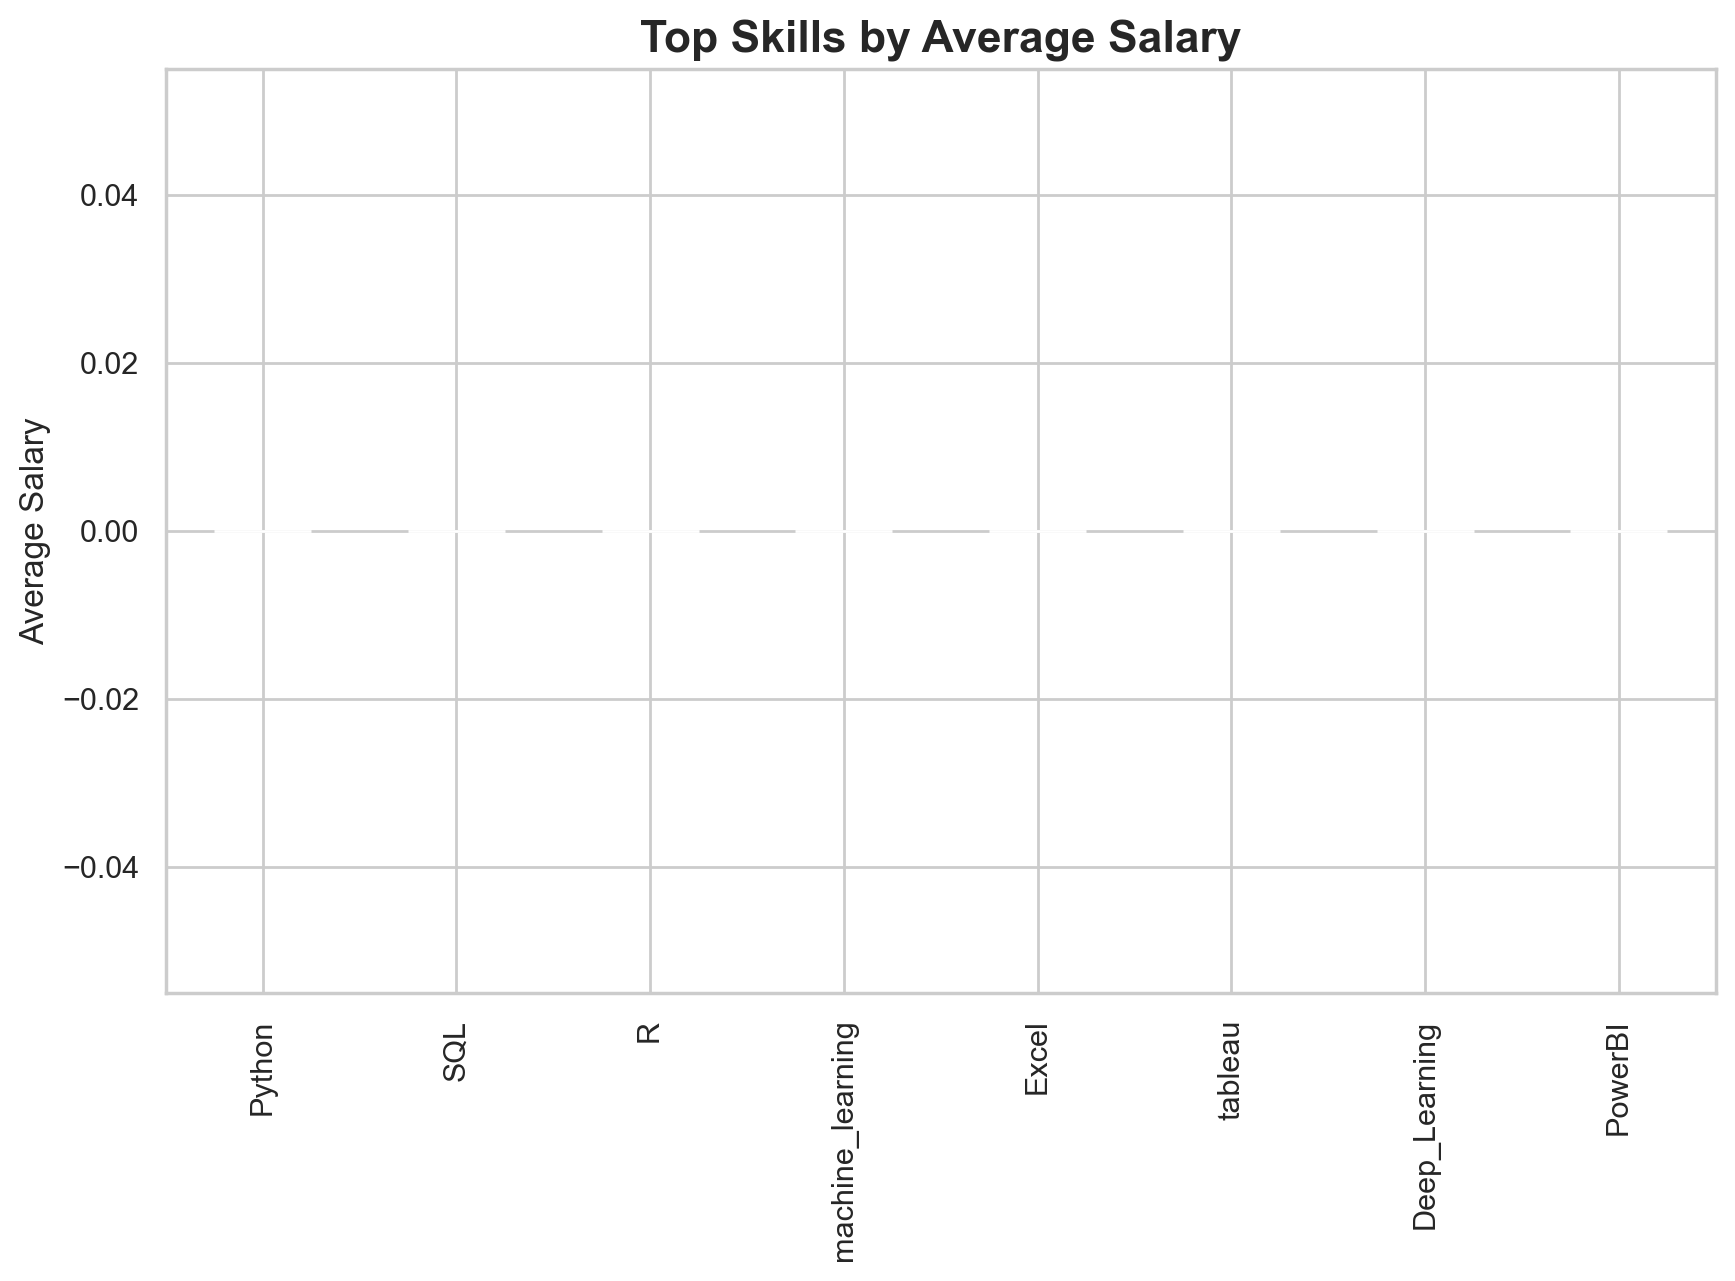

In [89]:
# Step 7: Top Skills by Average Salary
skill_cols = ['Python','SQL','R','machine_learning','Excel','tableau','Deep_Learning','PowerBI']

skill_salary = {}
for skill in skill_cols:
    avg_salary = df.loc[df[skill]==1, 'Avg_Salary'].mean()
    skill_salary[skill] = avg_salary

skill_salary = pd.Series(skill_salary).sort_values(ascending=False)

plt.figure(figsize=(10,6))
skill_salary.plot(kind='bar', color='orange')
plt.title("Top Skills by Average Salary", fontsize=16, weight='bold')
plt.ylabel("Average Salary")
plt.show()

C:\Users\madhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\madhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


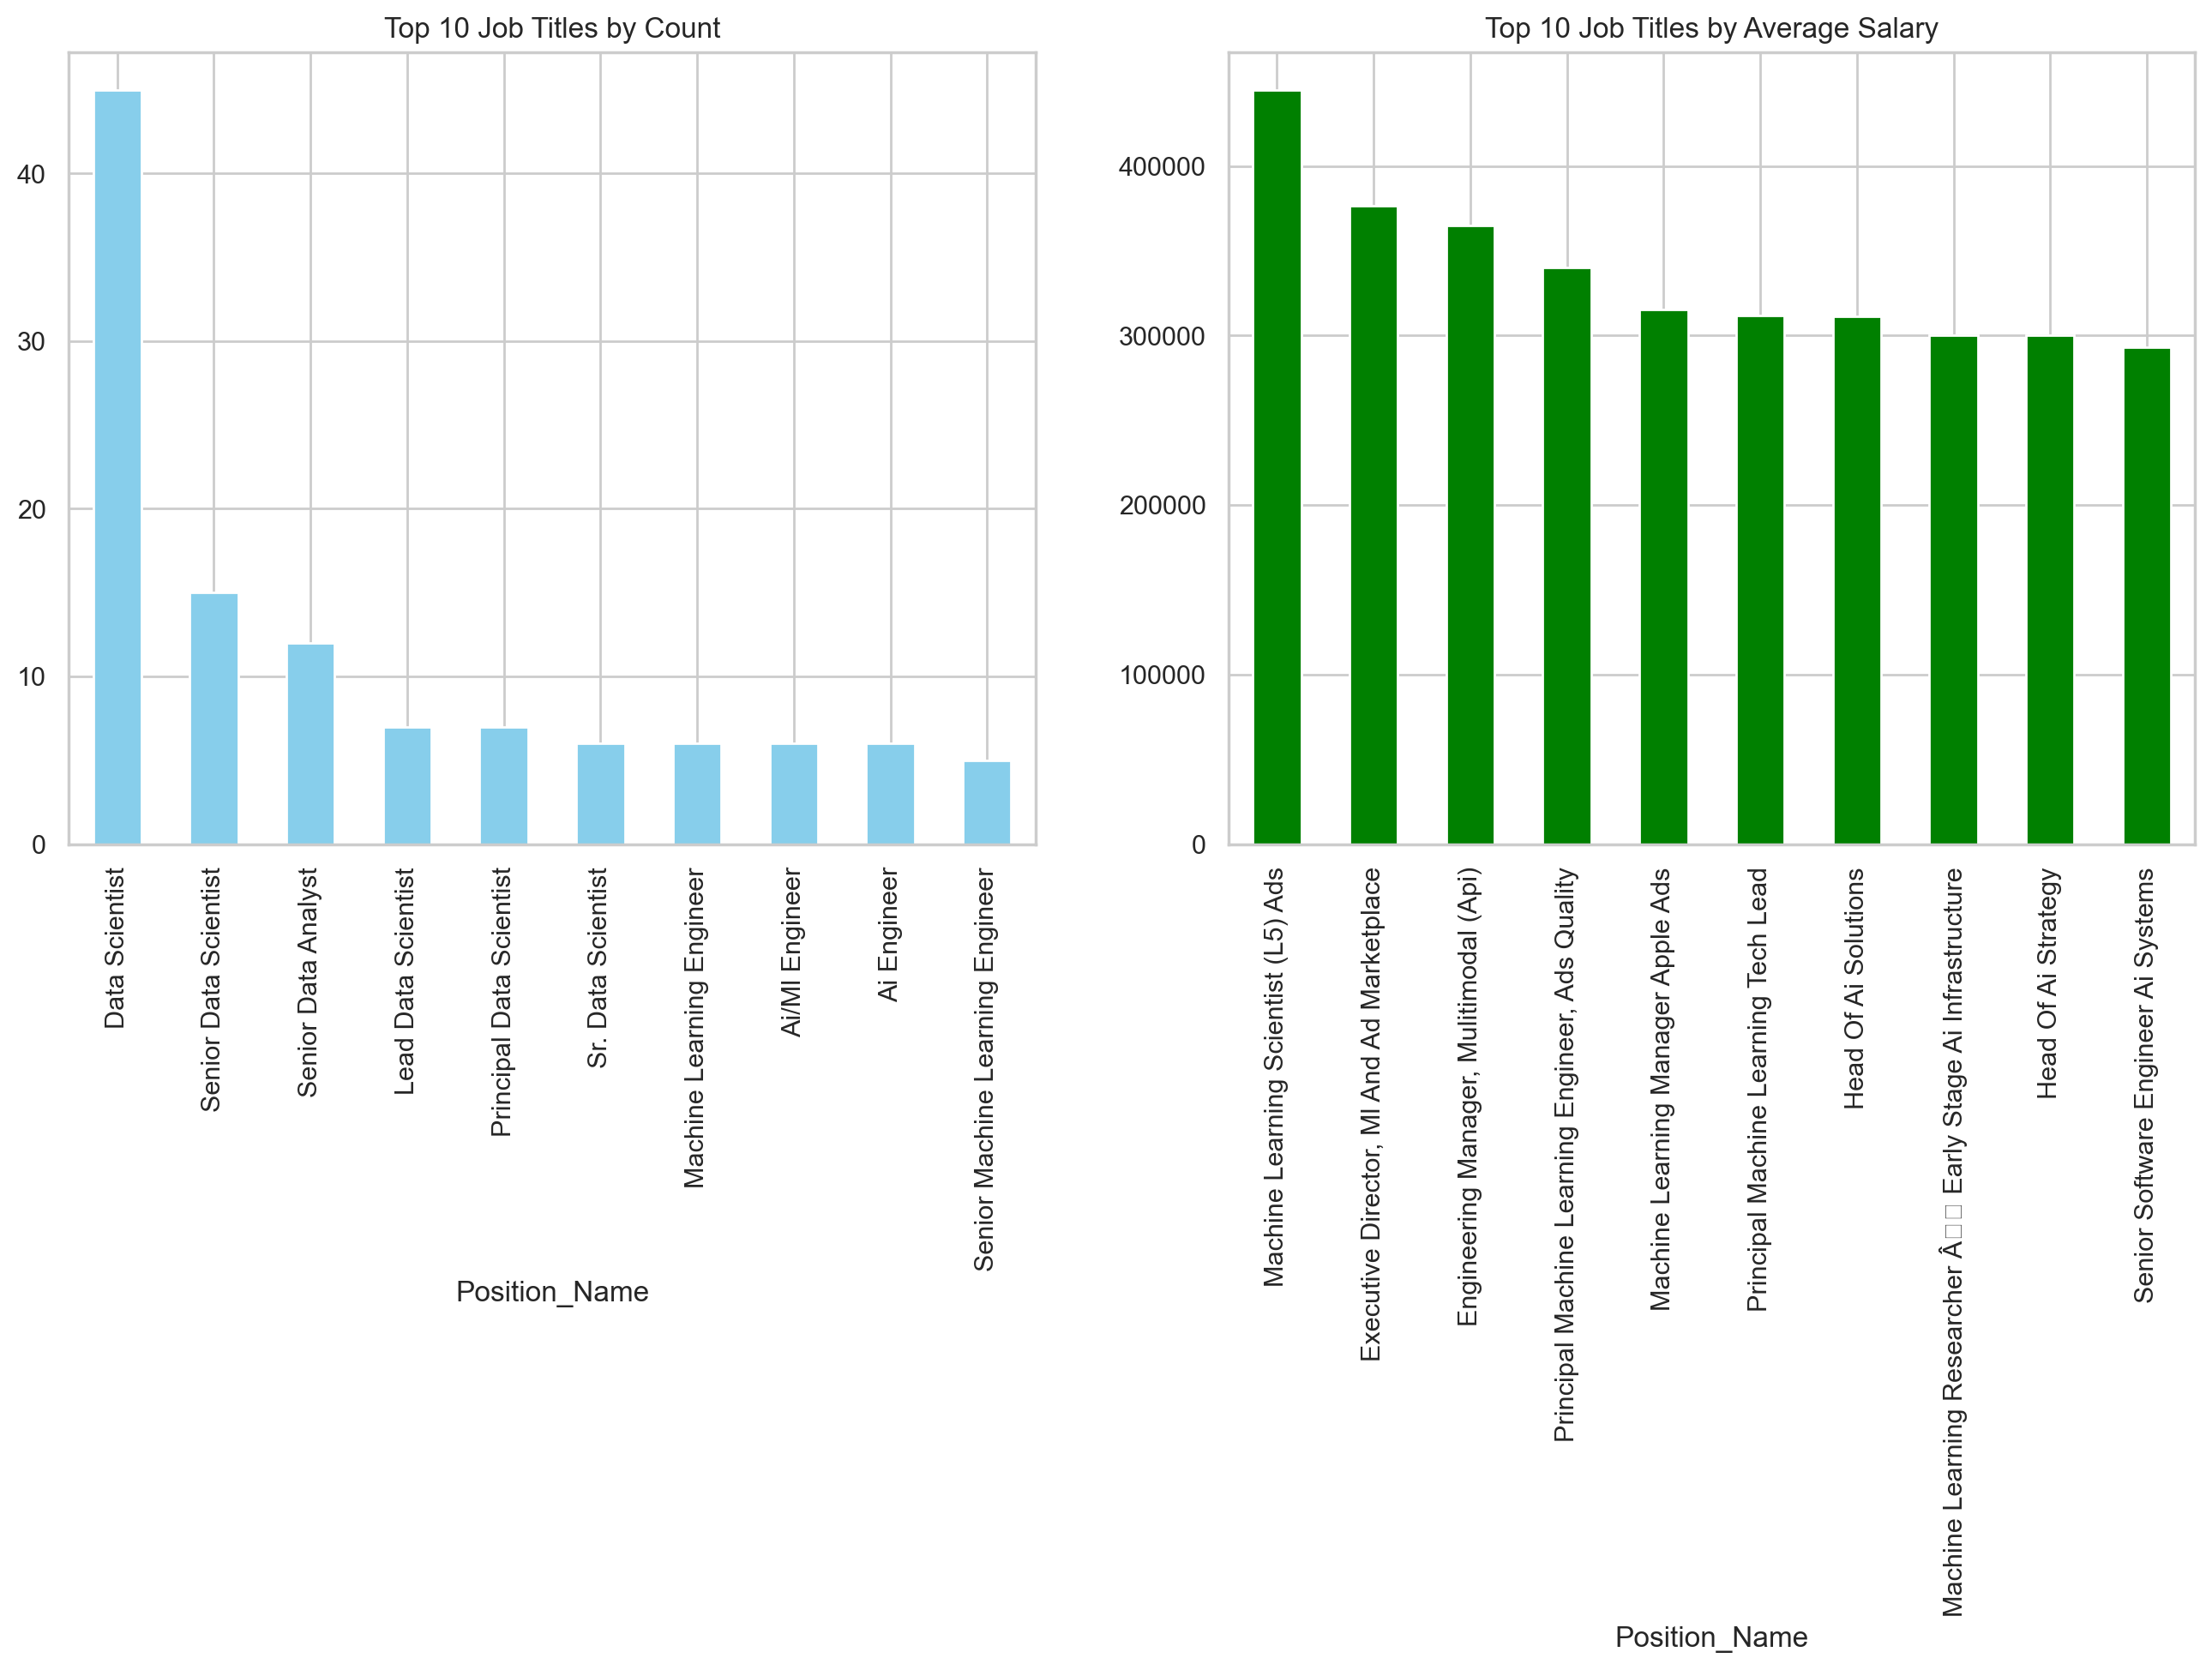

In [91]:
# Step 8: Top Job Titles (Count & Salary)
job_title_count = df['Position_Name'].value_counts().head(10)
job_title_salary = df.groupby('Position_Name')['Avg_Salary'].mean().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1,2, figsize=(16,6))

job_title_count.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Top 10 Job Titles by Count")

job_title_salary.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title("Top 10 Job Titles by Average Salary")

plt.show()

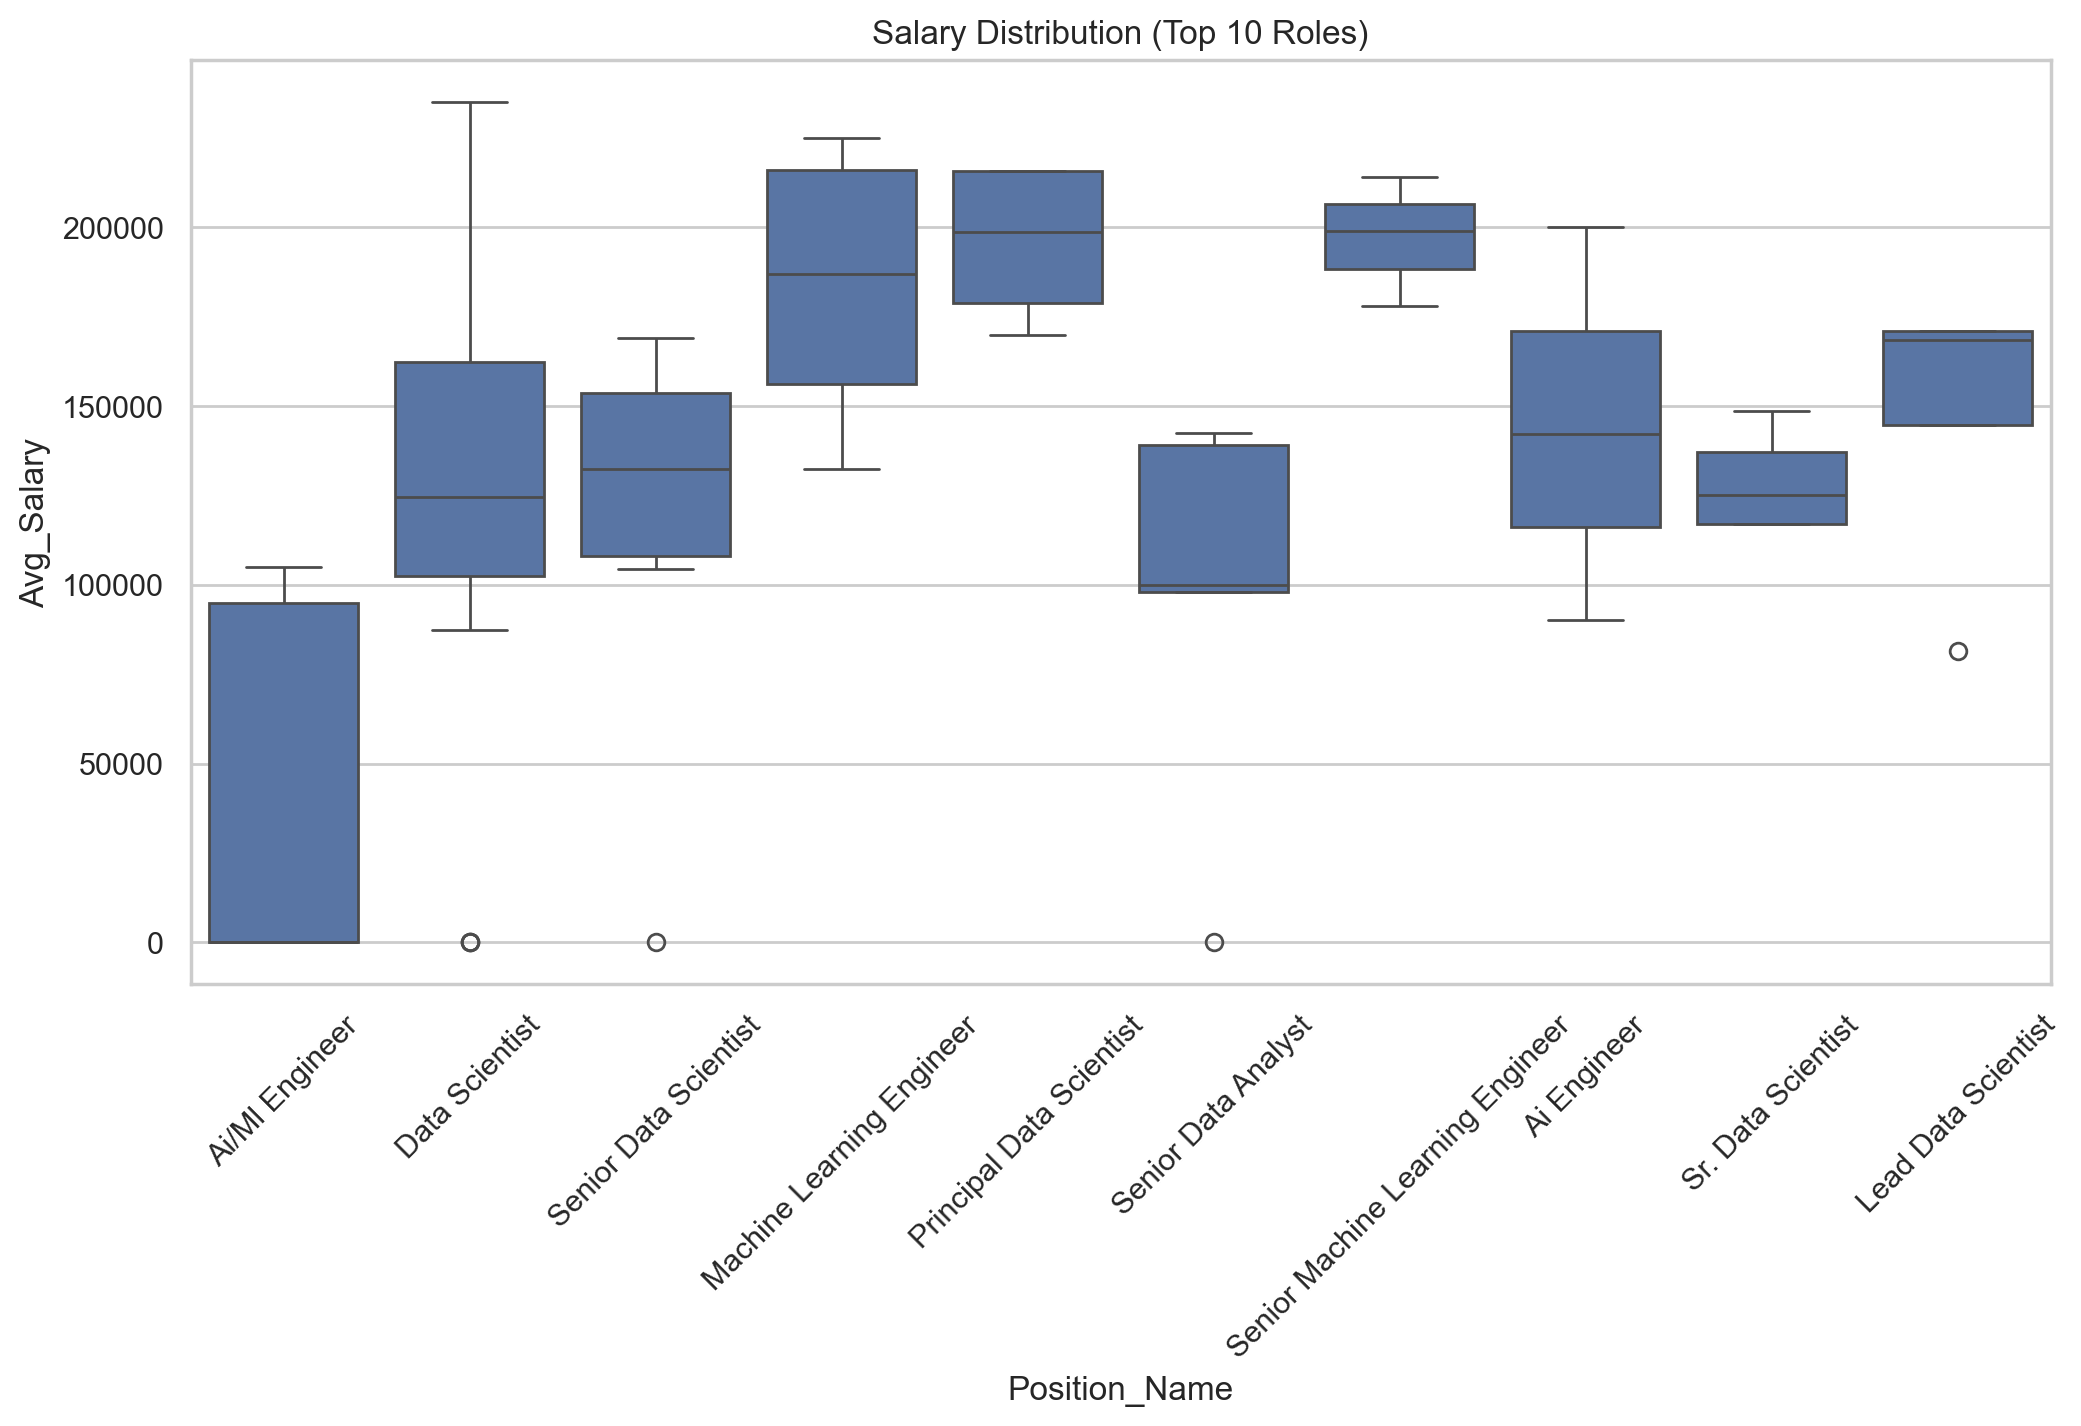

In [101]:
# Step 9: Salary Distribution
# Top 10 roles by count
top_roles = df['Position_Name'].value_counts().head(10).index
filtered_df = df[df['Position_Name'].isin(top_roles)]

plt.figure(figsize=(12,6))
sns.boxplot(x='Position_Name', y='Avg_Salary', data=filtered_df)
plt.xticks(rotation=45)
plt.title("Salary Distribution (Top 10 Roles)")
plt.show()

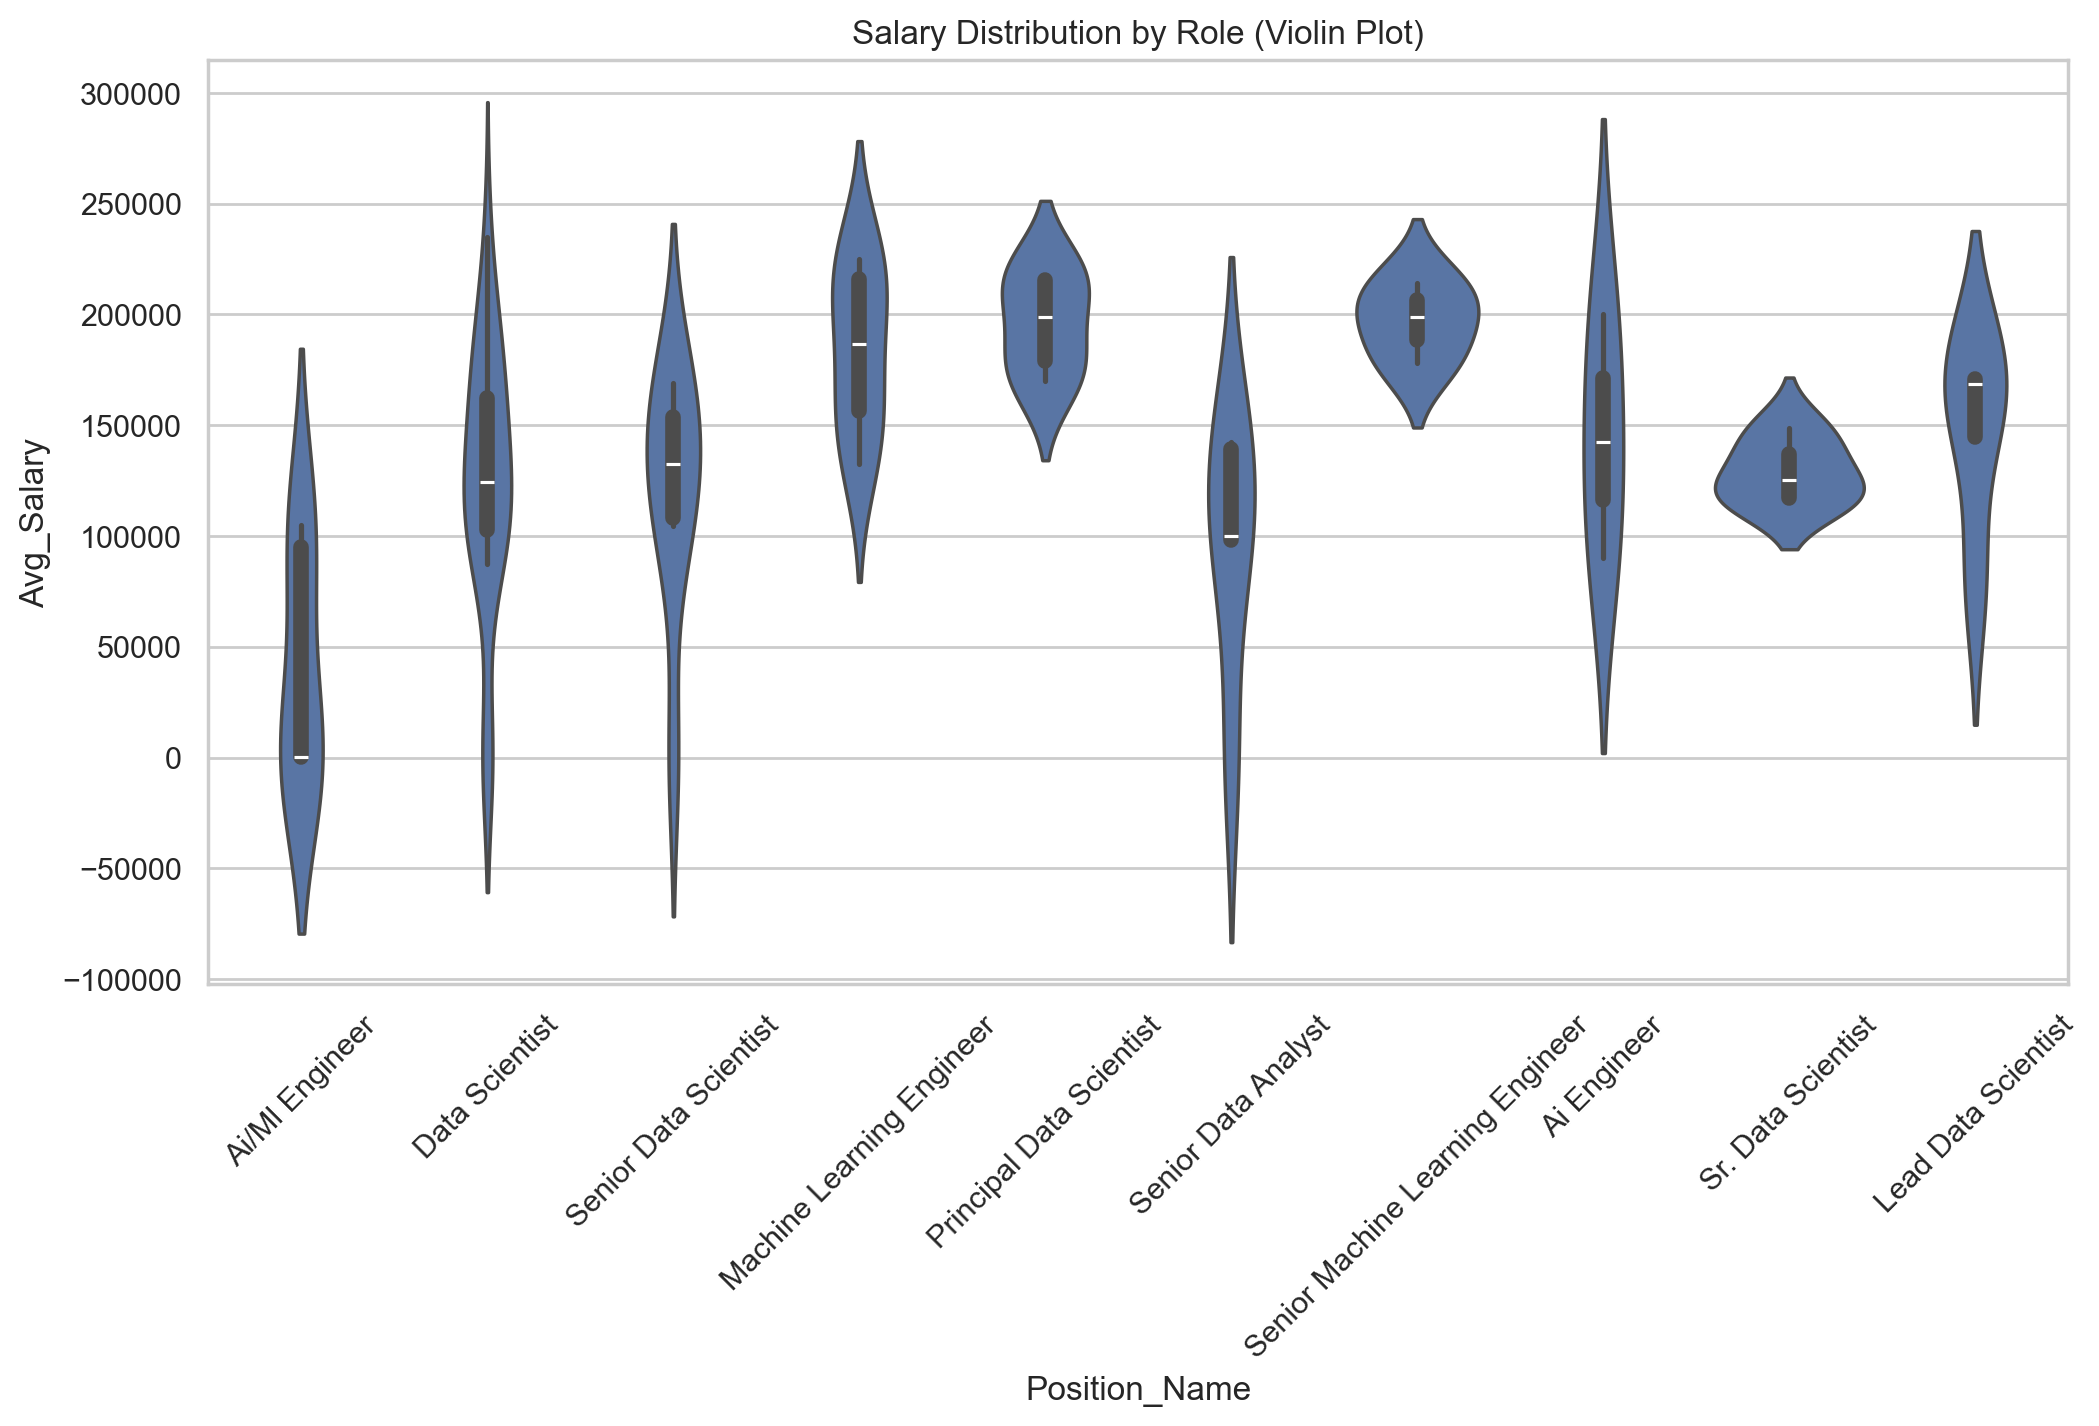

In [102]:
# Step 9: Salary Distribution use violin plot(better shape view)
plt.figure(figsize=(12,6))
sns.violinplot(x='Position_Name', y='Avg_Salary', data=filtered_df, inner='box')
plt.xticks(rotation=45)
plt.title("Salary Distribution by Role (Violin Plot)")
plt.show()


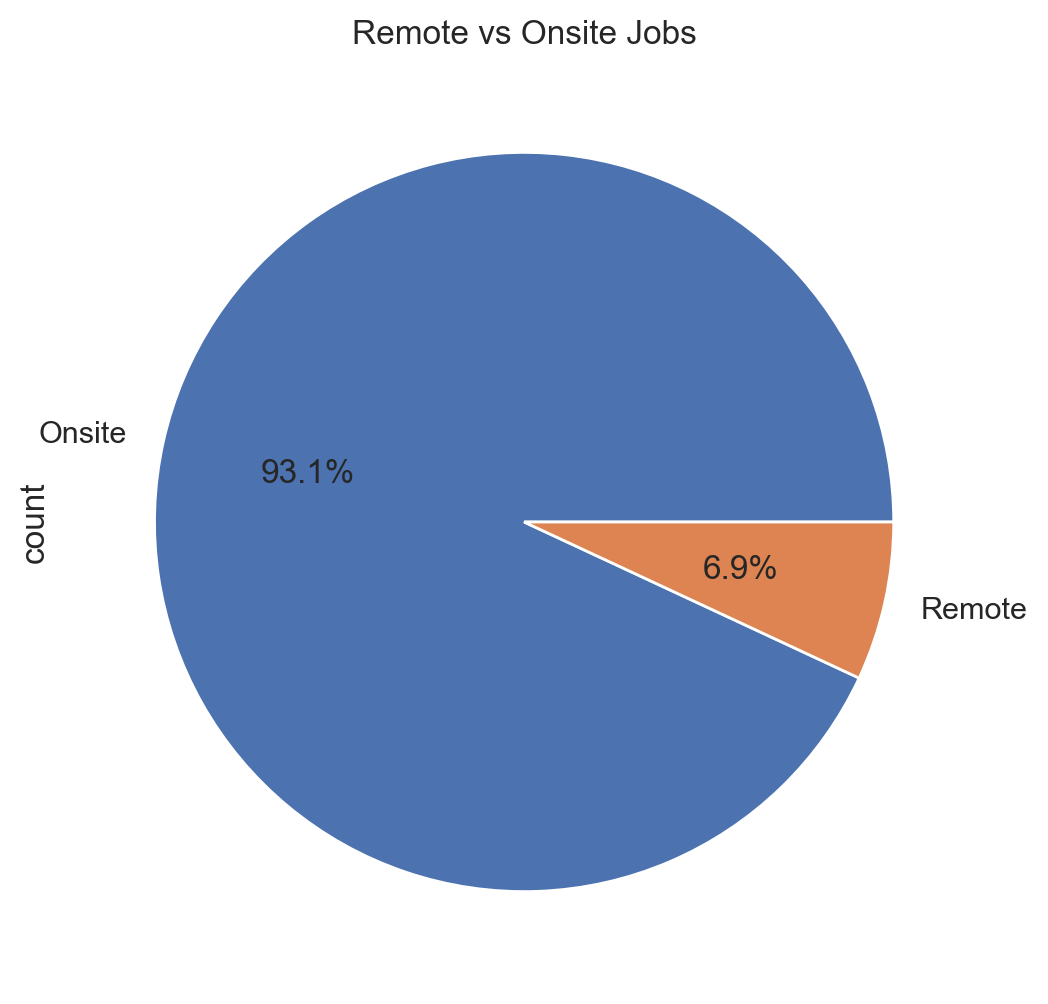

In [95]:
# Step 10: Remote vs Onsite
df['WorkType'] = df['Location'].apply(lambda x: 'Remote' if 'Remote' in str(x) else 'Onsite')
remote_count = df['WorkType'].value_counts()

plt.figure(figsize=(6,6))
remote_count.plot(kind='pie', autopct='%1.1f%%')
plt.title("Remote vs Onsite Jobs")
plt.show()

In [98]:
# Step 11: Correlation Analysis convert yes/no to numeric
# Convert yes/no into 1/0 for all skill columns
skill_cols = ['Python','SQL','R','machine_learning','Excel','tableau','Deep_Learning','PowerBI']

for col in skill_cols:
    df[col] = df[col].str.strip().str.lower().map({'yes':1, 'no':0})


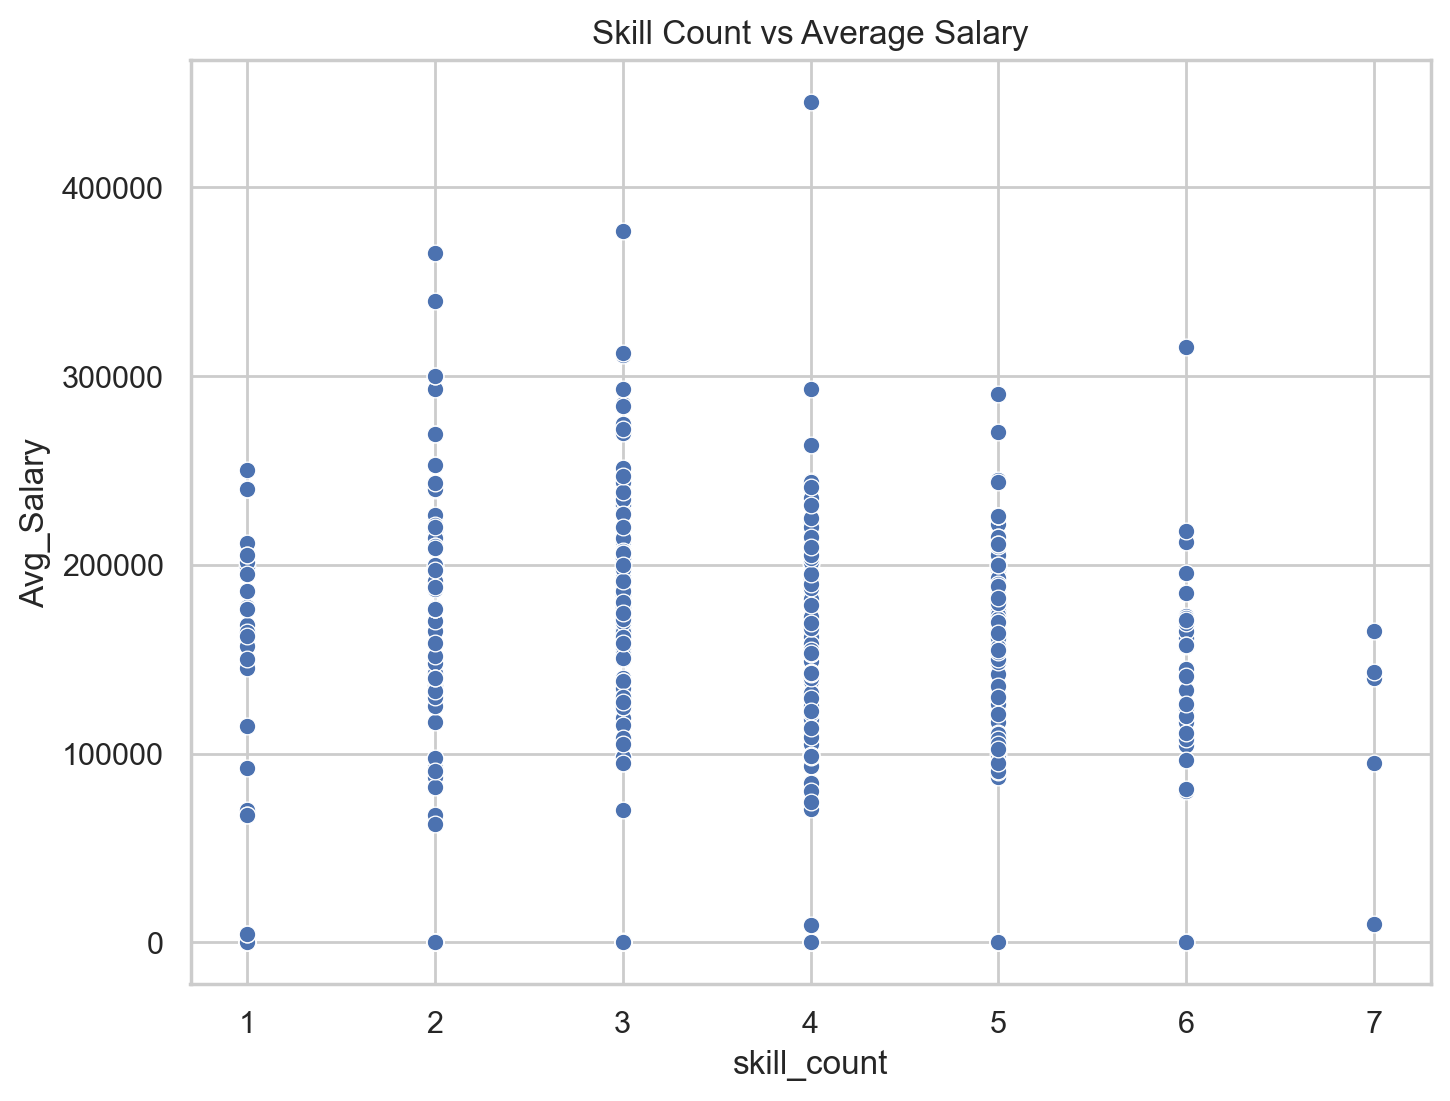

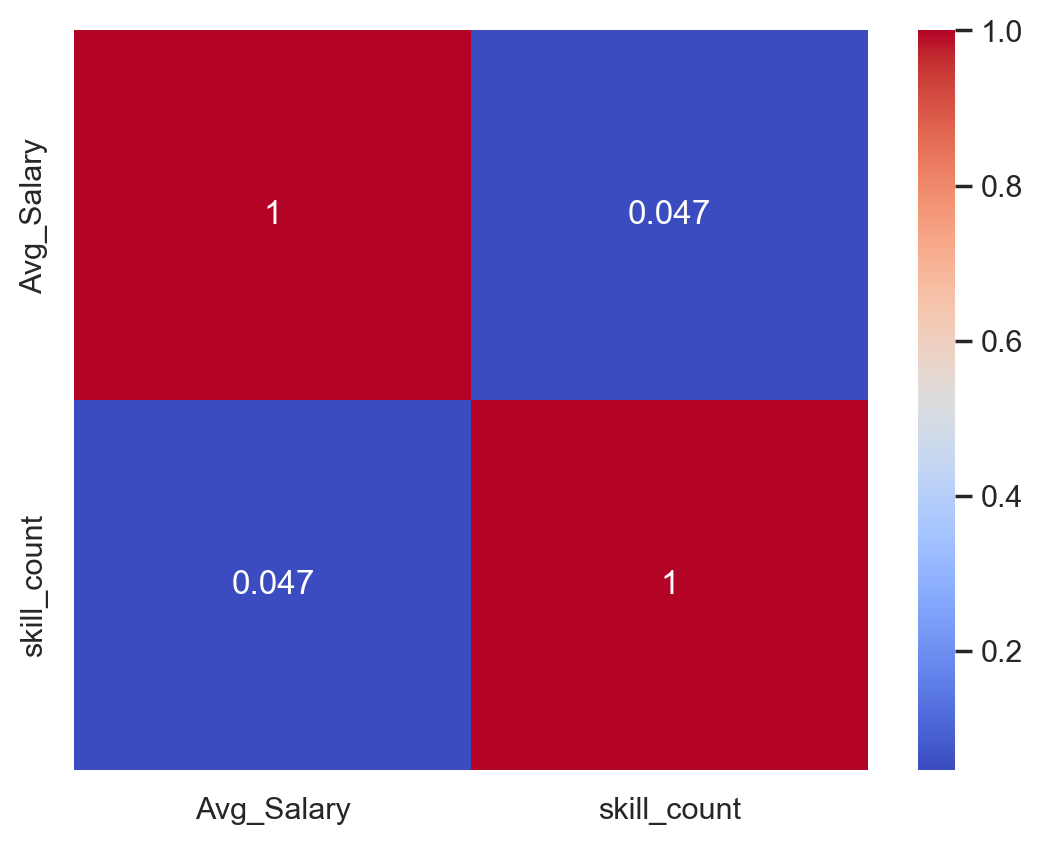

In [99]:
# Step 11: Correlation Analysis
df['skill_count'] = df[skill_cols].sum(axis=1)

plt.figure(figsize=(8,6))
sns.scatterplot(x='skill_count', y='Avg_Salary', data=df)
plt.title("Skill Count vs Average Salary")
plt.show()

# Correlation heatmap
corr = df[['Avg_Salary','skill_count']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Make a copy of the dataset
df_clean = df.copy()

# Convert all text to lowercase for consistency
df_clean['JobType_All'] = df_clean['JobType_All'].str.lower().str.strip()

# Map messy values to clean ones
df_clean['JobType_Clean'] = df_clean['JobType_All'].replace({
    'remote': 'Remote',
    'work from home': 'Remote',
    'wfh': 'Remote',
    'onsite': 'Onsite',
    'on-site': 'Onsite',
    'office': 'Onsite',
    'hybrid': 'Hybrid'
})

# Any unknown values → "Other"
df_clean['JobType_Clean'] = df_clean['JobType_Clean'].fillna("Other")

df_clean['JobType_Clean'].value_counts()

JobType_Clean
full-time                                    431
Other                                        234
contract                                      42
full-time, contract                            7
part-time                                      4
internship                                     4
part-time, full-time                           3
part-time, contract                            3
temporary, contract                            3
full-time, internship                          1
temporary, part-time, full-time, contract      1
temporary, part-time                           1
permanent                                      1
Name: count, dtype: int64

In [116]:
df['JobType_All'].unique()




array(['Full-time', nan, 'Part-time', 'Contract', 'Full-time, Internship',
       'Temporary, Contract', 'Part-time, Contract',
       'Full-time, Contract', 'Temporary, Part-time, Full-time, Contract',
       'Temporary, Part-time', 'Part-time, Full-time', 'Internship',
       'Permanent'], dtype=object)

In [120]:
df['JobType_All'] = df['JobType_All'].astype(str).str.lower().str.strip()

mapping = {
    'full-time': 'Full-time',
    'full time': 'Full-time',
    'fulltime': 'Full-time',
    'contract': 'Contract',
    'internship': 'Internship',
    'part-time': 'Other',
    'part time': 'Other',
    'temporary': 'Other',
    'freelance': 'Other'
}

df['JobType_Clean'] = df['JobType_All'].replace(mapping)
df['JobType_Clean'] = df['JobType_Clean'].fillna('Other')

C:\Users\madhu\AppData\Local\Temp\ipykernel_16784\832895013.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobType_Clean', order=df['JobType_Clean'].value_counts().index, palette="viridis")


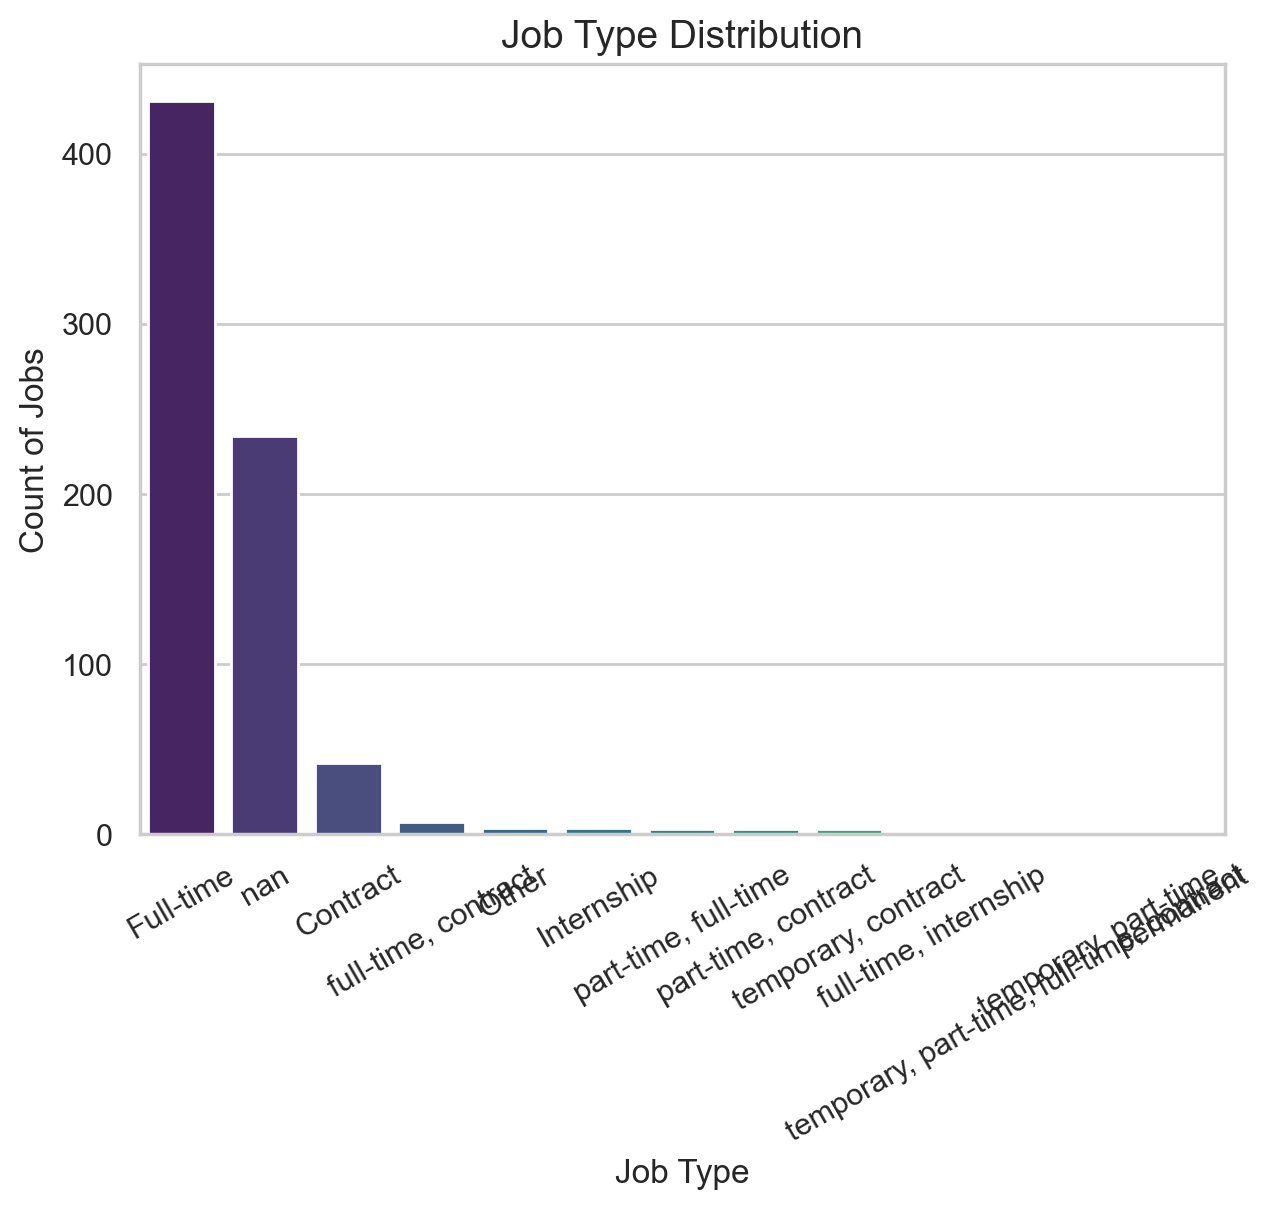

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(data=df, x='JobType_Clean', order=df['JobType_Clean'].value_counts().index, palette="viridis")
plt.title("Job Type Distribution", fontsize=14)
plt.xlabel("Job Type")
plt.ylabel("Count of Jobs")
plt.xticks(rotation=30)
plt.show()


<Figure size 800x600 with 0 Axes>

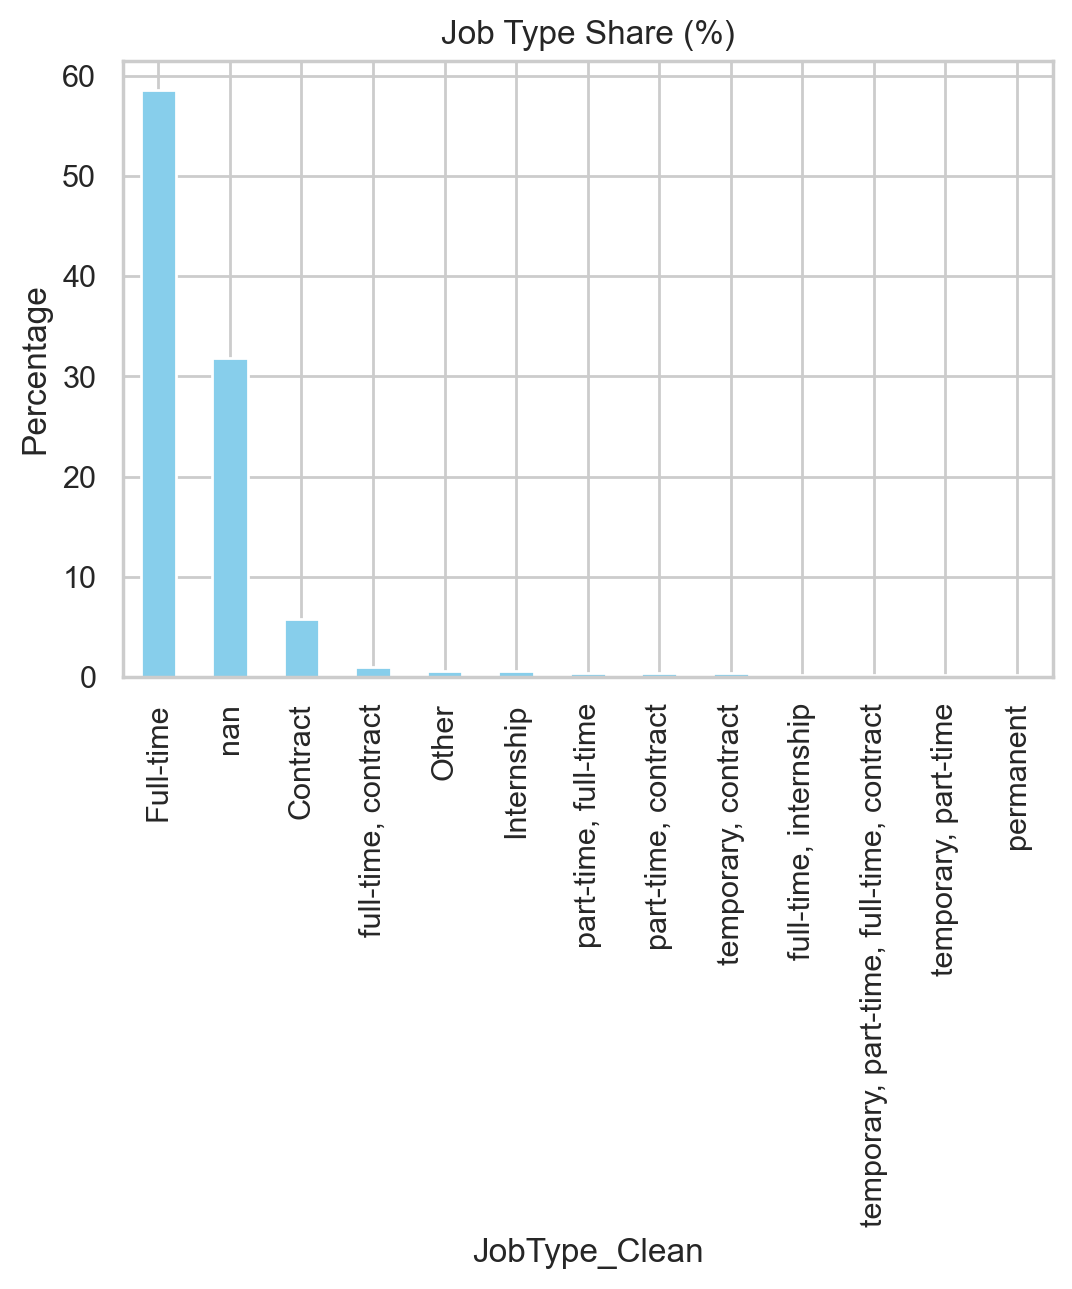

In [125]:
jobtype_counts = df['JobType_Clean'].value_counts(normalize=True) * 100
jobtype_counts.plot(kind='bar', figsize=(6,4), color="skyblue")
plt.title("Job Type Share (%)")
plt.ylabel("Percentage")
plt.show()

In [129]:
#NLP on Job Descriptions
from sklearn.feature_extraction.text import CountVectorizer

# Clean job description text
df['Description'] = df['Description'].astype(str).str.lower()

vectorizer = CountVectorizer(stop_words='english', max_features=30)
desc_matrix = vectorizer.fit_transform(df['Description'])

skills_from_text = pd.DataFrame(desc_matrix.toarray(), columns=vectorizer.get_feature_names_out())
skills_from_text.sum().sort_values(ascending=False).head(20)


data           6881
experience     5001
ai             3570
work           2521
team           2133
business       2129
learning       2042
science        1837
solutions      1598
including      1582
models         1547
skills         1522
machine        1462
years          1435
benefits       1400
role           1372
technical      1370
ml             1359
development    1330
engineering    1277
dtype: int64

C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


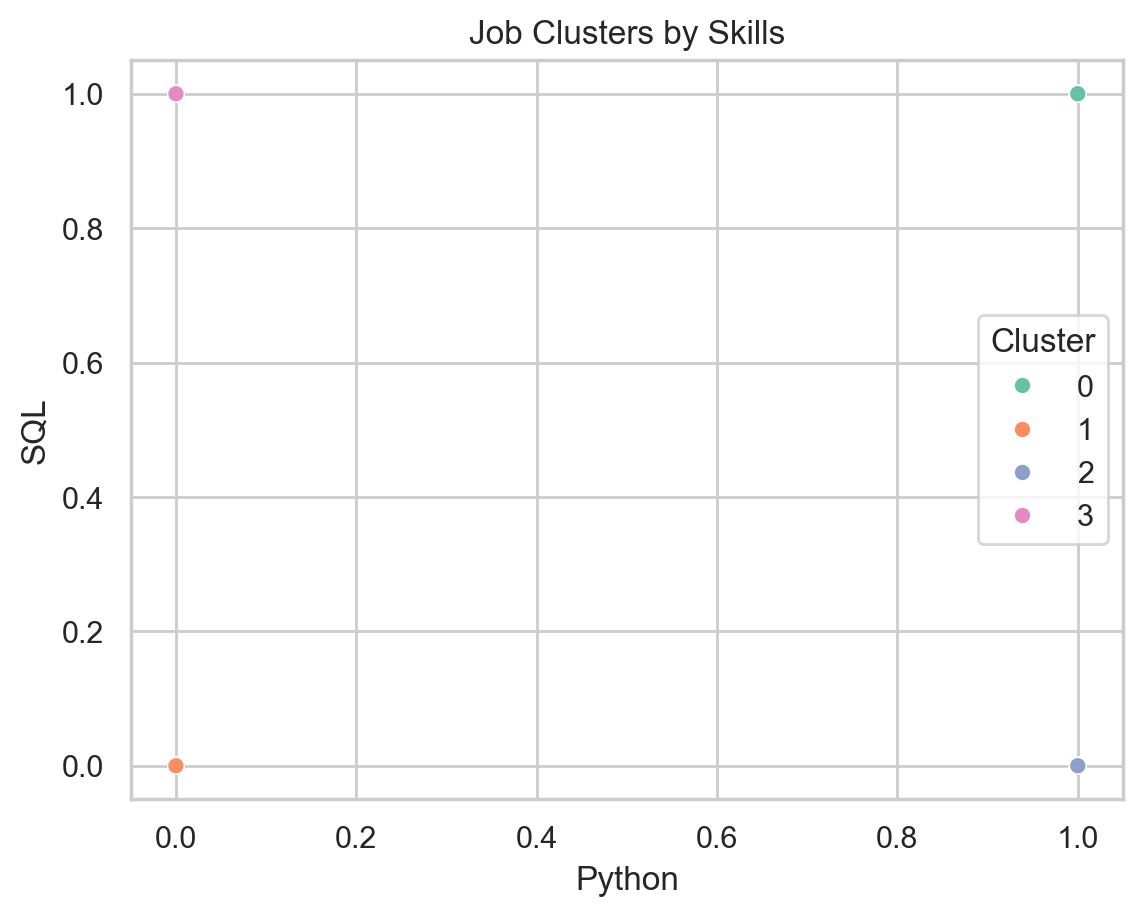

In [131]:
#Clustering Jobs by Skills (K-Means)
from sklearn.cluster import KMeans

X = df[skill_cols]
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

sns.scatterplot(x='Python', y='SQL', hue='Cluster', data=df, palette='Set2')
plt.title("Job Clusters by Skills")
plt.show()


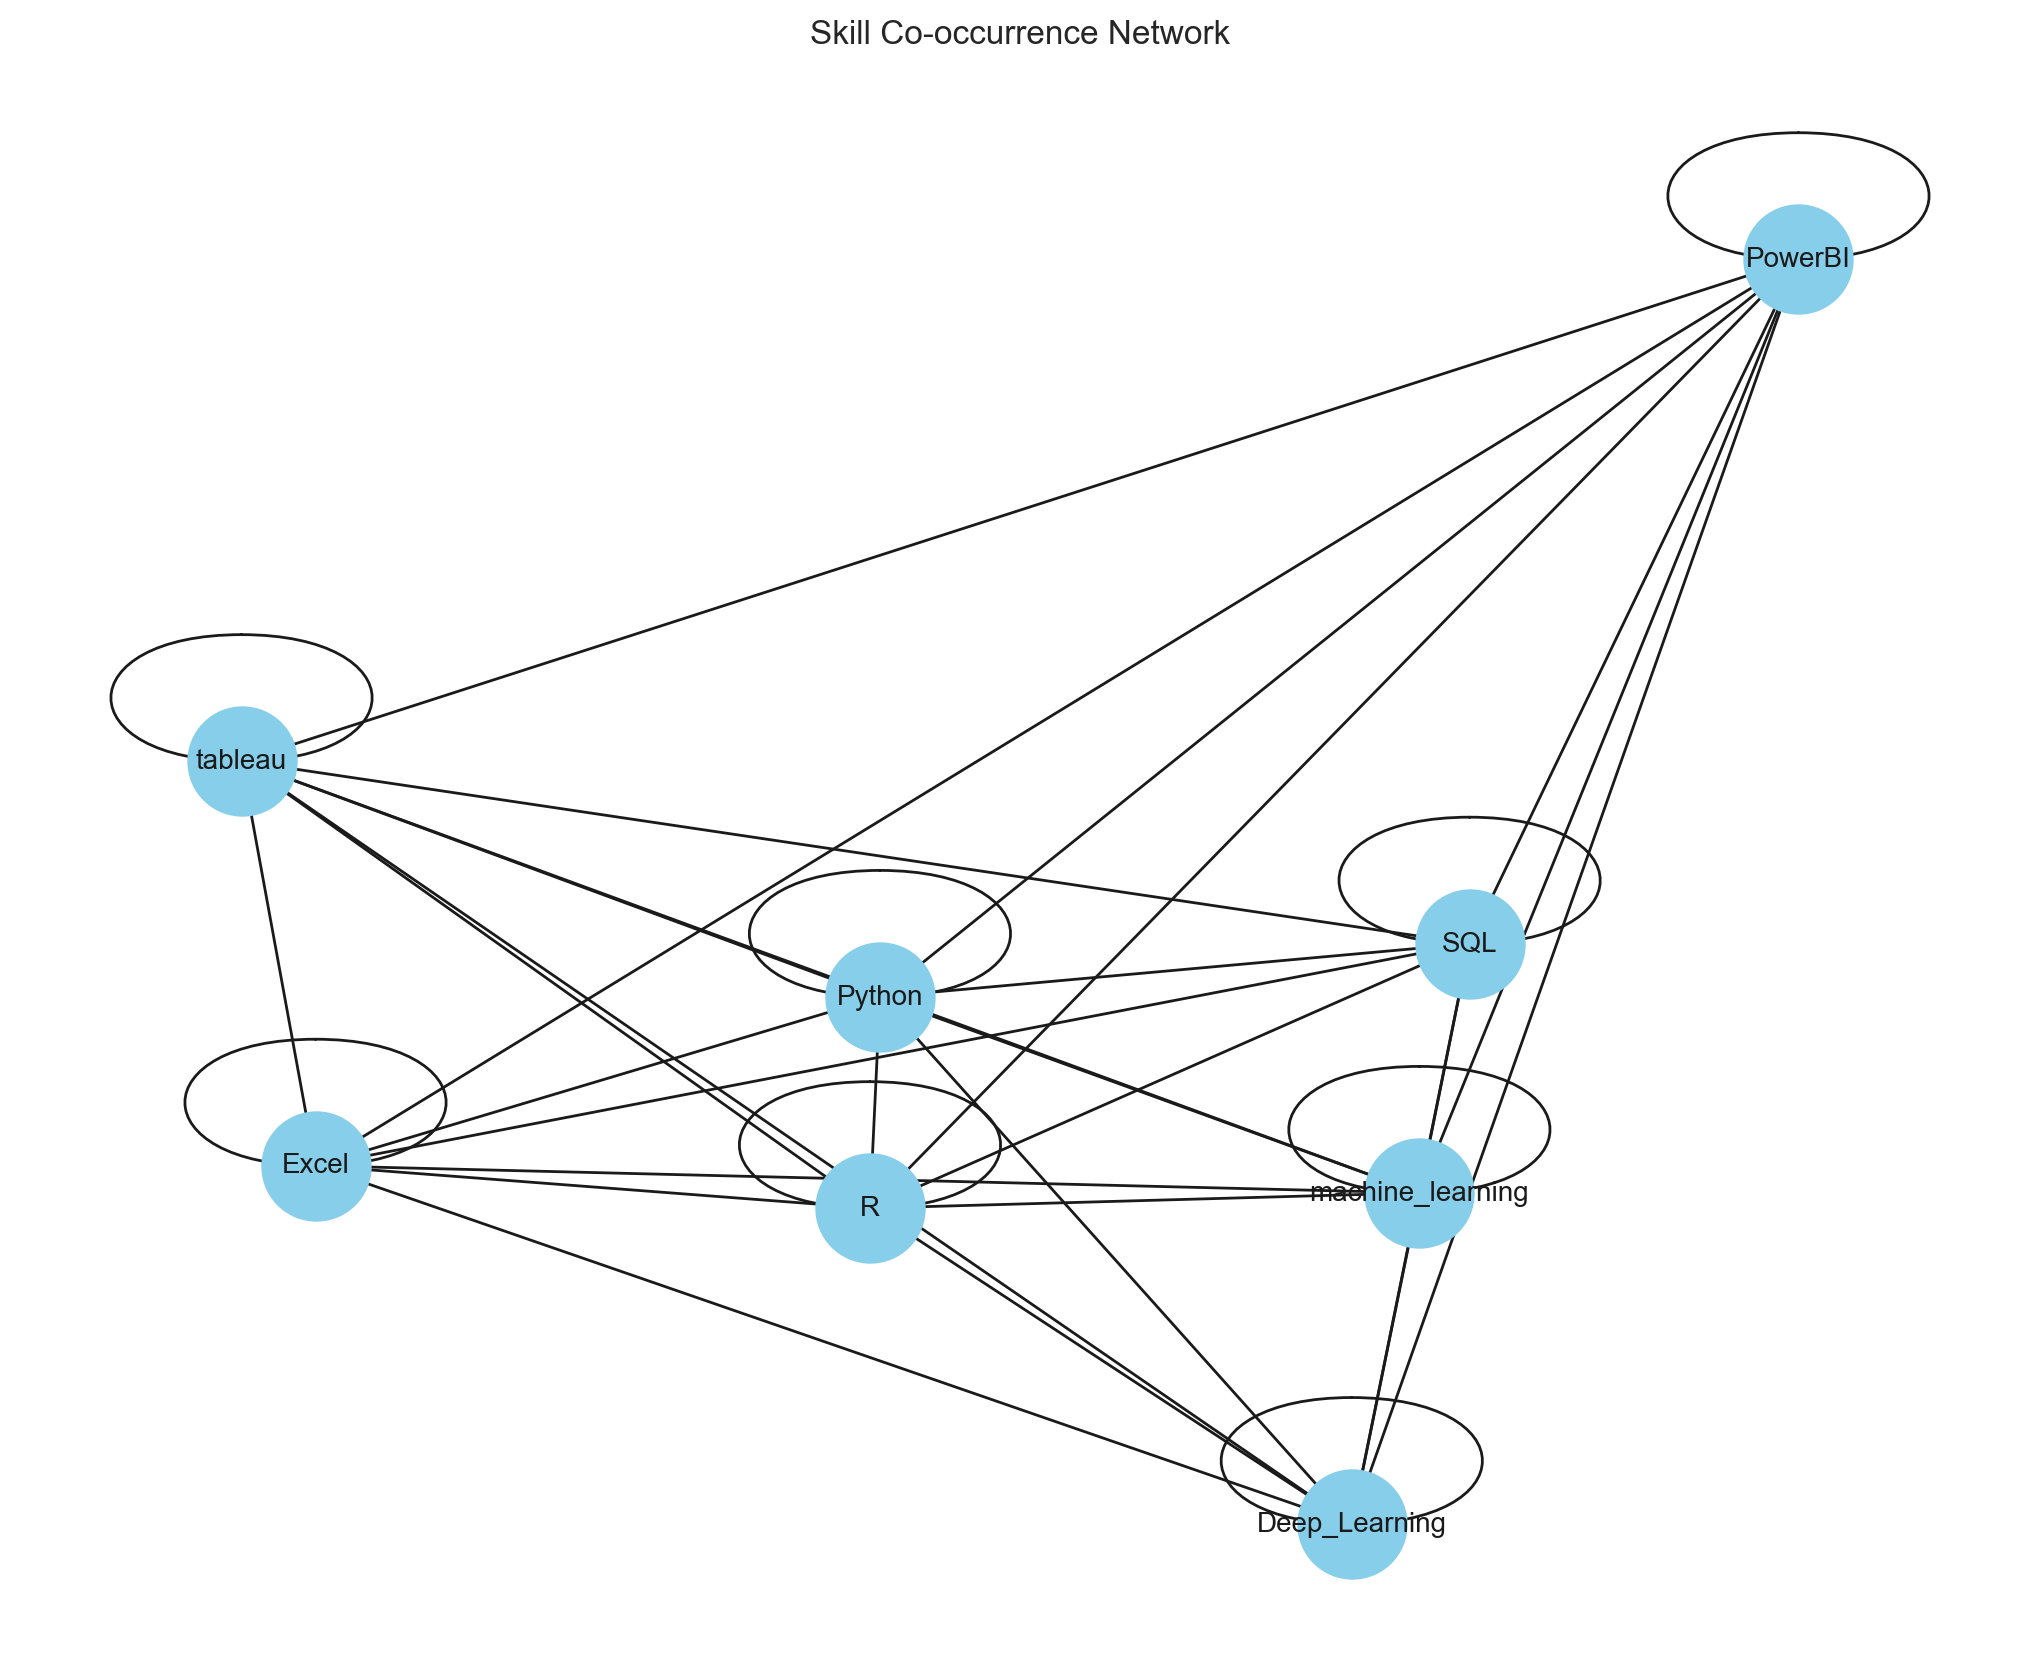

In [133]:
#Skill Co-occurrence Network
import networkx as nx

# Build co-occurrence network
skill_corr = df[skill_cols].T.dot(df[skill_cols])
G = nx.from_pandas_adjacency(skill_corr)

plt.figure(figsize=(10,8))
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", font_size=10)
plt.title("Skill Co-occurrence Network")
plt.show()


In [135]:
# Convert to lowercase & remove nulls
df['Description'] = df['Description'].astype(str).str.lower()

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

# Take top 30 keywords
vectorizer = CountVectorizer(stop_words='english', max_features=30)
desc_matrix = vectorizer.fit_transform(df['Description'])

# Convert to DataFrame
skills_from_text = pd.DataFrame(desc_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Show top 20 skills
skills_from_text.sum().sort_values(ascending=False).head(20)


data           6881
experience     5001
ai             3570
work           2521
team           2133
business       2129
learning       2042
science        1837
solutions      1598
including      1582
models         1547
skills         1522
machine        1462
years          1435
benefits       1400
role           1372
technical      1370
ml             1359
development    1330
engineering    1277
dtype: int64

In [141]:
#select Skill Columns
skill_cols = ['Python','SQL','R','machine_learning','Excel','tableau','Deep_Learning','PowerBI']

X = df[skill_cols].fillna(0)

In [143]:
#Run K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


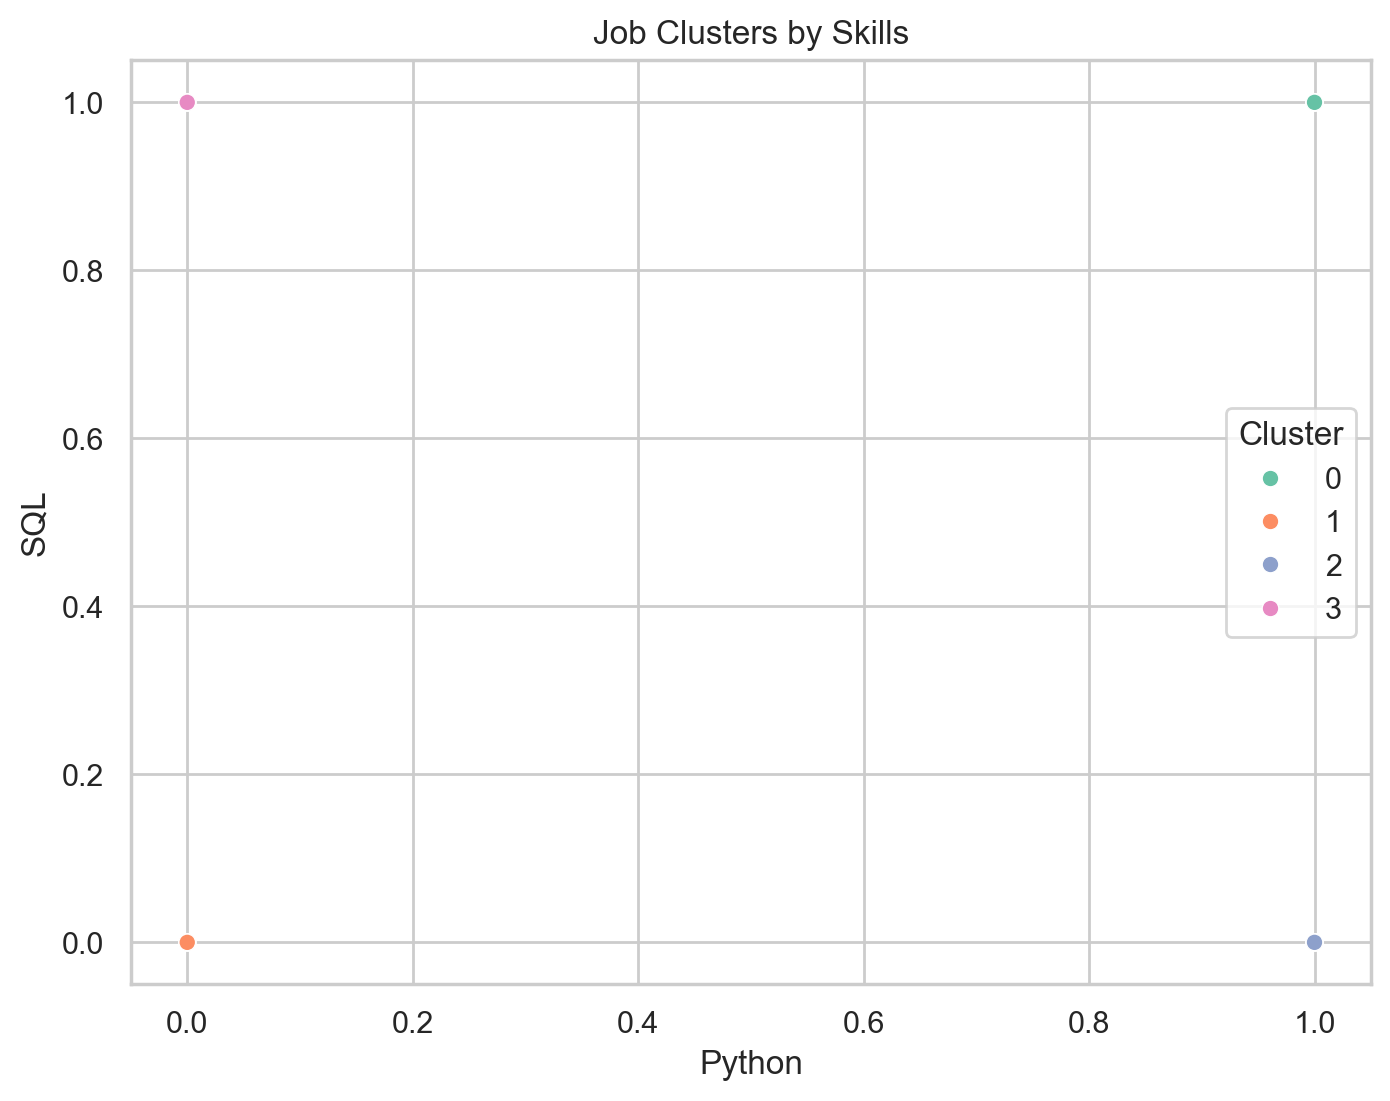

In [145]:
#Visualize Clusters
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Python'], y=df['SQL'], hue=df['Cluster'], palette='Set2')
plt.title("Job Clusters by Skills")
plt.show()


In [147]:
# Save cleaned dataset
df.to_csv("cleaned_jobs.csv", index=False)